In [1]:
# Perceptron for OR Gate
# Implement the OR Boolean logic gate using perceptron Neural Network. 
# Inputs = x1, x2 and bias, weights should be fed into the perceptron with single Output = y. Display final weights and bias of each perceptron.
# Inputs
inputs = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

# Weights and bias (predefined)
w1 = 1
w2 = 1
b = -0.5

def perceptron(x1, x2):
    z = w1*x1 + w2*x2 + b
    return 1 if z >= 0 else 0

# Test OR gate
for x1, x2 in inputs:
    print(f"{x1} OR {x2} = {perceptron(x1, x2)}")

print("Weights:", w1, w2)
print("Bias:", b)


0 OR 0 = 0
0 OR 1 = 1
1 OR 0 = 1
1 OR 1 = 1
Weights: 1 1
Bias: -0.5


In [64]:
# Task 2
# •	Use the iris dataset Encode the input and show the new representation
# •	Decode the lossy representation for the output 
# •	Map the input to reconstruction and visualize 

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load dataset
iris = load_iris()
X = iris.data

# Normalize data
X = MinMaxScaler().fit_transform(X)

# Encoder (4 → 3)
input_layer = Input(shape=(4,))
encoded = Dense(3, activation='relu')(input_layer)

# Decoder (3 → 4)
decoded = Dense(4, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train
autoencoder.fit(X, X, epochs=50, batch_size=16, verbose=0)

# Encode and Decode
encoded_data = Model(input_layer, encoded).predict(X)
decoded_data = autoencoder.predict(X)

# Visualization (first two features)
plt.scatter(X[:, 0], X[:, 1], label='Original')
plt.scatter(decoded_data[:, 0], decoded_data[:, 1], label='Reconstructed')
plt.legend()
plt.title('Iris Autoencoder Reconstruction (3 Neurons)')
plt.show()


In [63]:
# Question 2 
# Task 2
# •	Use the heart disease Dataset 
# •	Create an Auto Encoder and fit it with our data using 3 neurons in the dense layer
# •	Display new reduced dimension values
# •	Plot loss for different Auto encoders 

# Autoencoder on Heart Disease Dataset

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load heart disease dataset
data = pd.read_csv(r"C:\Users\anupk\Downloads\heart.csv")   # dataset should be in same folder
X = data.drop("target", axis=1)

# Normalize data
X = MinMaxScaler().fit_transform(X)

losses = []

# Autoencoders with different neurons
for neurons in [3, 5, 8]:
    input_layer = Input(shape=(X.shape[1],))
    encoded = Dense(neurons, activation='relu')(input_layer)
    decoded = Dense(X.shape[1], activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    history = autoencoder.fit(X, X, epochs=20, batch_size=16, verbose=0)
    losses.append(history.history['loss'])

# Reduced dimension using 3-neuron encoder
encoder = Model(input_layer, encoded)
reduced_data = encoder.predict(X)

print("Reduced Dimension Data (First 5 rows):")
print(reduced_data[:5])

# Plot loss
for i, neurons in enumerate([3, 5, 8]):
    plt.plot(losses[i], label=f"{neurons} Neurons")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Autoencoder Loss Comparison")
plt.show()

In [ ]:
 # Question 3 
 # Task 2
 # •	Load the Intel Image dataset 
 # •	Train and test the dataset
 # •	Create a model using CNN 
	# Evaluate the model using confusion matrix.


In [62]:
# !pip install tensorflow-datasets

In [18]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset from tensorflow-datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Intel/train",
    image_size=(150, 150),
    batch_size=32
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Intel/test",
    image_size=(150, 150),
    batch_size=32,
    shuffle=False
)
# train_ds = tf.keras.utils.image_dataset_from_directory(
#     r"C:\Users\anupk\Downloads\Intel\train",
#     image_size=(150, 150),
#     batch_size=32
# )

# test_ds = tf.keras.utils.image_dataset_from_directory(
#     r"C:\Users\anupk\Downloads\Intel\test",
#     image_size=(150, 150),
#     batch_size=32,
#     shuffle=False
# )
class_names = train_ds.class_names

# CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
model.fit(train_ds, epochs=5)

# Predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Intel/train'

<!-- •	Implement autoencoder 
•	Use the Iris Dataset 
•	Create an autoencoder and fit it with our data using 2 neurons in the dense layer
•	 Plot loss w.r.t. epoch
•	Calculate reconstruction error using Mean Squared Error (MSE). -->


In [ ]:
# •	Implement autoencoder 
# •	Use the Iris Dataset 
# •	Create an autoencoder and fit it with our data using 2 neurons in the dense layer
# •	 Plot loss w.r.t. epoch
# •	Calculate reconstruction error using Mean Squared Error (MSE).


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Reconstruction Error (MSE): 0.05206129710677191


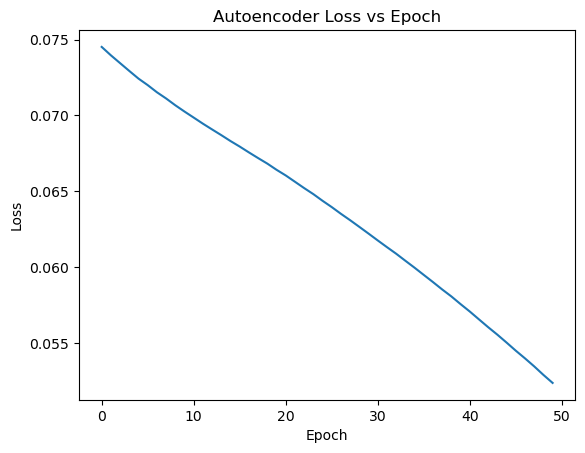

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load Iris dataset
iris = load_iris()
X = iris.data

# Normalize data
X = MinMaxScaler().fit_transform(X)

# Autoencoder
input_layer = Input(shape=(4,))
encoded = Dense(2, activation='relu')(input_layer)   # 2 neurons
decoded = Dense(4, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train model
history = autoencoder.fit(X, X, epochs=50, batch_size=16, verbose=0)

# Reconstruction
X_reconstructed = autoencoder.predict(X)

# Reconstruction error (MSE)
mse = mean_squared_error(X, X_reconstructed)
print("Reconstruction Error (MSE):", mse)

# Plot loss vs epoch
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Autoencoder Loss vs Epoch")
plt.show()


In [20]:
#  NOT Perceptron

In [24]:
# Inputs for NOT gate
# x2 is kept 0 (dummy input)
inputs = [
    (0, 0),
    (1, 0)
]

# Weights and bias (predefined for NOT gate)
w1 = -1     # negative weight
w2 = 1      # x2 not used
b = 0.5     # positive bias

def perceptron(x1, x2):
    z = w1*x1 + w2*x2 + b
    return 1 if z >= 0 else 0

# Test NOT gate
for x1, x2 in inputs:
    print(f"NOT {x1} = {perceptron(x1, x2)}")

print("Final Weights:")
print("w1 =", w1)
print("w2 =", w2)
print("Bias =", b)


NOT 0 = 1
NOT 1 = 0
Final Weights:
w1 = -1
w2 = 1
Bias = 0.5


In [25]:
# Task 2
# 1. Use the Iris Dataset 
# 2.Create an Auto Encoder and fit it with our data using 3 neurons in the dense layer
# 3. Display new reduced dimension values
# 4.Plot loss for different encoders 


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Reduced Dimension Data (First 5 rows):
[[0.39879888 0.31047794 0.5005562  0.15473068 0.4278604  0.
  0.         0.        ]
 [0.30298638 0.26453623 0.31692946 0.06958024 0.2887673  0.
  0.         0.        ]
 [0.37214488 0.27177307 0.35836422 0.09104973 0.32976875 0.
  0.         0.        ]
 [0.3487213  0.26284915 0.2970516  0.08332117 0.28781304 0.
  0.         0.        ]
 [0.430924   0.3146951  0.5172708  0.16817498 0.44587705 0.
  0.         0.        ]]


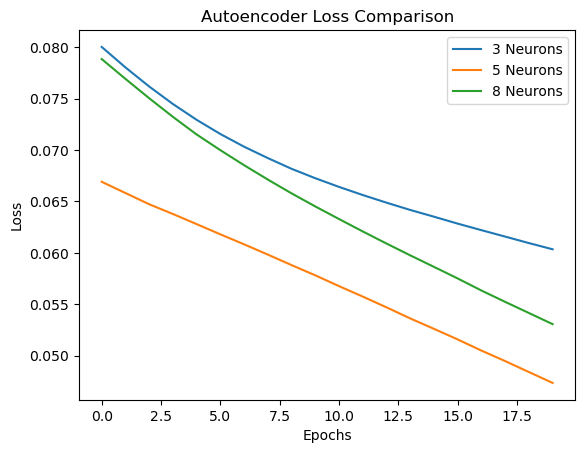

In [28]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.datasets import load_iris

# Load heart disease dataset
iris = load_iris()
X = iris.data    # only features (no target)


# Normalize data
X = MinMaxScaler().fit_transform(X)

losses = []

# Autoencoders with different neurons
for neurons in [3, 5, 8]:
    input_layer = Input(shape=(X.shape[1],))
    encoded = Dense(neurons, activation='relu')(input_layer)
    decoded = Dense(X.shape[1], activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    history = autoencoder.fit(X, X, epochs=20, batch_size=16, verbose=0)
    losses.append(history.history['loss'])

# Reduced dimension using 3-neuron encoder
encoder = Model(input_layer, encoded)
reduced_data = encoder.predict(X)

print("Reduced Dimension Data (First 5 rows):")
print(reduced_data[:5])

# Plot loss
for i, neurons in enumerate([3, 5, 8]):
    plt.plot(losses[i], label=f"{neurons} Neurons")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Autoencoder Loss Comparison")
plt.show()

In [30]:
# # Task 2
# Use the heart disease dataset and do the following
# •	Use the Dataset 
# •	Create an autoencoder and fit it with our data using 2 neurons in the dense layer
# •	 Plot loss w.r.t. epochs
# •	Calculate reconstruction error using Mean Squared Error (MSE).


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Reconstruction Error (MSE): 0.05102842683033198


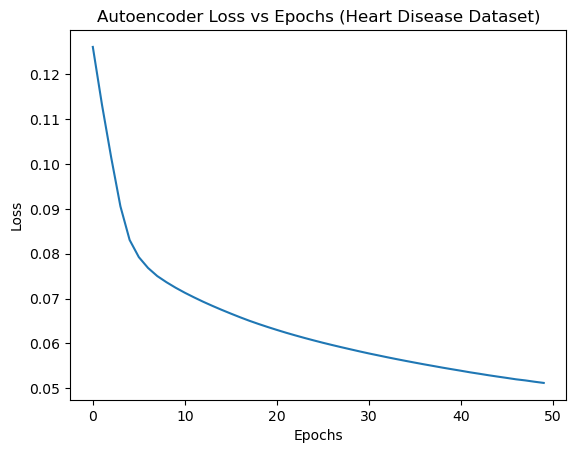

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# 1. Load Heart Disease Dataset
data = pd.read_csv(r"C:\Users\anupk\Downloads\heart.csv")
X = data.drop("target", axis=1)   # remove label

# 2. Normalize the data
X = MinMaxScaler().fit_transform(X)

# 3. Create Autoencoder (2 neurons in dense layer)
input_layer = Input(shape=(X.shape[1],))
encoded = Dense(2, activation='relu')(input_layer)     # 2 neurons
decoded = Dense(X.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 4. Fit the model
history = autoencoder.fit(
    X, X,
    epochs=50,
    batch_size=16,
    verbose=0
)

# 5. Reconstruction
X_reconstructed = autoencoder.predict(X)

# 6. Reconstruction Error (MSE)
mse = mean_squared_error(X, X_reconstructed)
print("Reconstruction Error (MSE):", mse)

# 7. Plot Loss vs Epochs
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Autoencoder Loss vs Epochs (Heart Disease Dataset)")
plt.show()


In [34]:
#  •	Load California Housing dataset and select 2 features (e.g., Median Income, House Age) and 1 target (Median House Value).
# •	Normalize inputs and initialize a single-layer NN with random weights and bias.
# •	Perform forward propagation, calculate prediction error, Squared Error, and MSE.
# •	Update weights and bias using gradient descent.
# •	Plot Loss vs Weight, Loss vs Bias, and Error Surface.


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

# Load dataset
data = pd.read_csv(r"C:\Users\anupk\Downloads\housing.csv")
# data = fetch_california_housing()
X = data[['MedInc', 'HouseAge']].values
y = data['MedHouseValue'].values.reshape(-1, 1)

# Normalize inputs
X = MinMaxScaler().fit_transform(X)
y = MinMaxScaler().fit_transform(y)

# Initialize weights and bias
w = np.random.rand(2,1)
b = np.random.rand(1)
lr = 0.1
epochs = 20

losses = []
weights = []
biases = []

# Training
for _ in range(epochs):
    y_pred = np.dot(X, w) + b             # Forward propagation
    error = y - y_pred
    squared_error = error ** 2
    mse = np.mean(squared_error)

    # Store values
    losses.append(mse)
    weights.append(w[0][0])
    biases.append(b[0])

    # Gradient descent
    dw = -2 * np.mean(X * error, axis=0).reshape(2,1)
    db = -2 * np.mean(error)

    w = w - lr * dw
    b = b - lr * db

print("Final Weights:", w.flatten())
print("Final Bias:", b)
print("Final MSE:", mse)
plt.plot(weights, losses)
plt.xlabel("Weight")
plt.ylabel("Loss")
plt.title("Loss vs Weight")
plt.show()
plt.plot(biases, losses)
plt.xlabel("Bias")
plt.ylabel("Loss")
plt.title("Loss vs Bias")
plt.show()
W, B = np.meshgrid(np.linspace(0,1,20), np.linspace(0,1,20))
Z = []

for w0, b0 in zip(W.flatten(), B.flatten()):
    pred = X[:,0].reshape(-1,1) * w0 + b0
    Z.append(np.mean((y - pred) ** 2))

Z = np.array(Z).reshape(W.shape)

plt.contourf(W, B, Z, cmap='viridis')
plt.xlabel("Weight")
plt.ylabel("Bias")
plt.title("Error Surface")
plt.colorbar()
plt.show()


C:\Users\anupk\anaconda3\Lib\site-packages\sklearn\datasets\_base.py:1518: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


HTTPError: HTTP Error 403: Forbidden

In [36]:
#  Take the dataset of Life expectancy 
# Initialize a neural network with random weights.
# a)	Calculate output of Neural Network
# b)	Calculate squared error loss
# c)	Plot the mean squared error for each iteration in stochastic Gradient Descent.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load dataset
data = pd.read_csv("Life_Expectancy_Data.csv")

# Select 2 input features and target
X = data[['Adult Mortality', 'BMI']].dropna()
y = data.loc[X.index, 'Life expectancy ']

# Normalize
X = MinMaxScaler().fit_transform(X)
y = MinMaxScaler().fit_transform(y.values.reshape(-1,1))

# Initialize random weights and bias
w = np.random.rand(2)
b = np.random.rand()
lr = 0.1
epochs = 30

mse_list = []

# Stochastic Gradient Descent updates weights for each sapmple 
for _ in range(epochs):
    for i in range(len(X)):
        xi = X[i]
        yi = y[i]

        # (a) Forward propagation
        y_pred = np.dot(xi, w) + b

        # (b) Squared error
        error = yi - y_pred
        squared_error = error ** 2

        # Store MSE
        mse_list.append(squared_error)

        # Gradient descent update
        w = w + lr * error * xi
        b = b + lr * error

print("Final Weights:", w)
print("Final Bias:", b)
plt.plot(mse_list)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Iteration (SGD)")
plt.show()


In [ ]:
# Implement autoencoder 
# •	Use the Wine Dataset 
# •	Create an autoencoder and fit it with our data using 3 neurons in the dense layer
# •	 Calculate loss w.r.t to different epochs and plot using line graph.


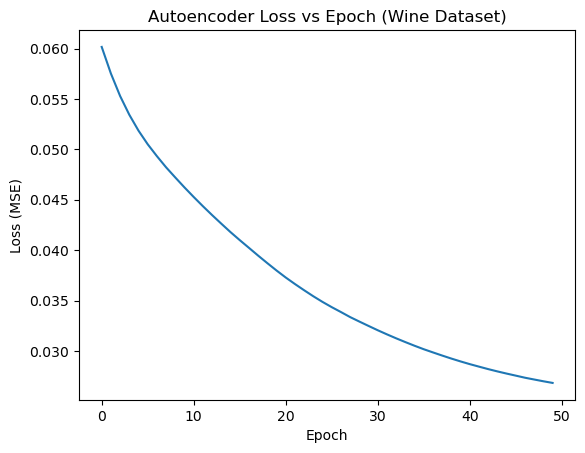

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load Wine dataset
wine = load_wine()
X = wine.data

# Normalize data
X = MinMaxScaler().fit_transform(X)

# Autoencoder architecture
input_layer = Input(shape=(X.shape[1],))
encoded = Dense(3, activation='relu')(input_layer)     # 3 neurons
decoded = Dense(X.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train model
history = autoencoder.fit(X, X, epochs=50, batch_size=16, verbose=0)

# Plot loss vs epoch
plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Autoencoder Loss vs Epoch (Wine Dataset)")
plt.show()


In [38]:
# Implement Self Organizing Map for anomaly Detection
# •	Use Credit Card Applications Dataset:
# •	Detect fraud customers in the dataset using SOM and perform hyperparameter tuning
# •	Show map and use markers to distinguish frauds.


In [40]:
!pip install minisom

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for minisom: filename=minisom-2.3.5-py3-none-any.whl size=12132 sha256=7a940e27d015ef6c6632dbe27f74c3819b203786ac560f43448a1bdf0675a6ff
  Stored in directory: c:\users\anupk\appdata\local\pip\cache\wheels\df\bc\51\5a64336510519dc8062d6e17d458721906b85b09abe192481e
Successfully built minisom


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# Load dataset
dataset = pd.read_csv(r"C:\Users\anupk\Downloads\creditcard.csv")

X = dataset.iloc[:, :-1].values   # features
y = dataset.iloc[:, -1].values    # approved / not approved

# Normalize data
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

# -------------------------------
# Hyperparameter tuning (simple)
# -------------------------------
som_x, som_y = 10, 10
sigma = 1.0
learning_rate = 0.5

# Initialize SOM
som = MiniSom(
    x=som_x,
    y=som_y,
    input_len=X.shape[1],
    sigma=sigma,
    learning_rate=learning_rate
)

som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(7,7))
plt.pcolor(som.distance_map(), cmap='coolwarm')
plt.colorbar(label='Distance (Anomaly Score)')

# Mark frauds
for i, x in enumerate(X):
    w = som.winner(x)
    if y[i] == 0:   # not approved → potential fraud
        plt.text(w[0]+0.5, w[1]+0.5, 'F',
                 color='red', fontsize=12, ha='center', va='center')
    else:
        plt.text(w[0]+0.5, w[1]+0.5, 'N',
                 color='green', fontsize=9, ha='center', va='center')

plt.title("SOM Fraud Detection Map")
plt.show()

# -------------------------------
# Extract fraud customers
# -------------------------------
mappings = som.win_map(X)
frauds = np.concatenate(
    [mappings[cell] for cell in mappings if som.distance_map()[cell] > 0.9],
    axis=0
)

frauds = sc.inverse_transform(frauds)
print("Fraud Customers (Sample):")
print(frauds[:5])


KeyboardInterrupt: 

In [ ]:
# Train a small neural network (dataset - MNIST classification) 
# Compare the optimizers:
# 1.	SGD
# 2.	SGD + Momentum
# 3.	Adam
# Plot:
# 1.	Training loss vs epochs
# 2.	Accuracy vs epochs


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step


C:\Users\anupk\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


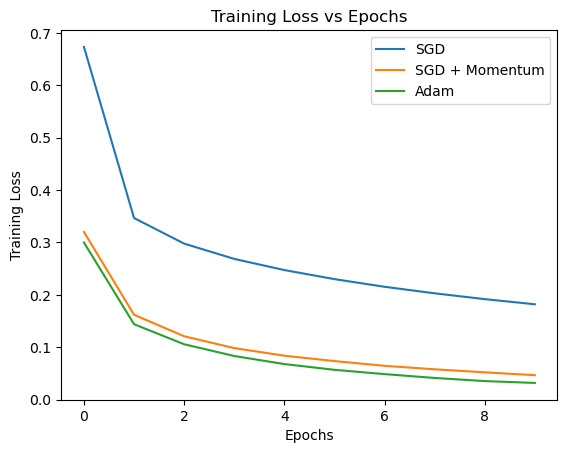

In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
# with np.load(r"C:\Users\anupk\Downloads\mnist.npz") as data:
#     x_train = data['x_train']
#     y_train = data['y_train']
#     x_test  = data['x_test']
#     y_test  = data['y_test']

# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "mnist/train", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "mnist/test", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Small neural network model
def create_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

epochs = 10
histories = {}

# 1. SGD
model_sgd = create_model(tf.keras.optimizers.SGD())
histories['SGD'] = model_sgd.fit(x_train, y_train, epochs=epochs, verbose=0)

# 2. SGD + Momentum
model_momentum = create_model(tf.keras.optimizers.SGD(momentum=0.9))
histories['SGD + Momentum'] = model_momentum.fit(x_train, y_train, epochs=epochs, verbose=0)

# 3. Adam
model_adam = create_model(tf.keras.optimizers.Adam())
histories['Adam'] = model_adam.fit(x_train, y_train, epochs=epochs, verbose=0)
for name, history in histories.items():
    plt.plot(history.history['loss'], label=name)

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epochs")
plt.legend()
plt.show()

for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=name)

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()

In [43]:
# 1.	Use MNIST or IRIS/ Cifar-10 Dataset 
# 2.	Train a model with and without data augmentation (horizontal flip, rotation, noise).
# 3.	Compare generalization performance on the validation set. (Accuracy & Error)
# 4.	Evaluate the model using confusion matrix, precision, recall


C:\Users\anupk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy (No Aug): 0.9833333492279053
Validation Accuracy (Aug): 0.9746999740600586
Validation Error (No Aug): 0.016666650772094727
Validation Error (Aug): 0.025300025939941406
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


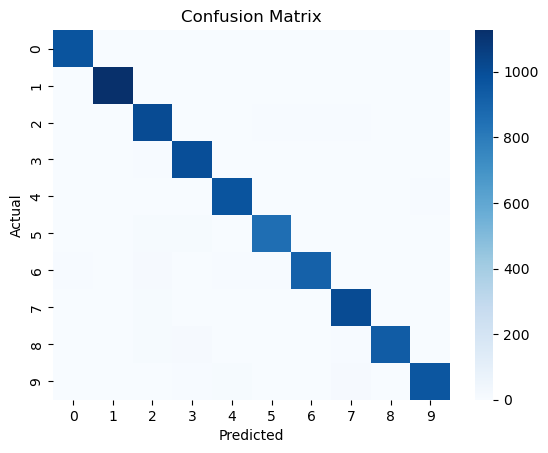

Precision: 0.975068244882007
Recall: 0.9742276317262935


In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns

# Load MNIST
# with np.load(r"C:\Users\anupk\Downloads\mnist.npz") as data:
#     x_train = data['x_train']
#     y_train = data['y_train']
#     x_test  = data['x_test']
#     y_test  = data['y_test']
# mnist
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "mnist/train", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "mnist/test", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])

#     iris 
# data = pd.read_csv("Iris.csv")

# X = data.iloc[:, :-1].values
# y = data.iloc[:, -1].astype('category').cat.codes.values

# OPTION 1️⃣ LOAD FROM LIBRARY (COMMENTED)
# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data
# y = iris.target



#              cifar-10
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "cifar10/train",
#     image_size=(32,32),
#     batch_size=32
# )

# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "cifar10/test",
#     image_size=(32,32),
#     batch_size=32
# )
# x_train = np.concatenate([x.numpy() for x, y in train_ds])
# y_train = np.concatenate([y.numpy() for x, y in train_ds])

# x_test = np.concatenate([x.numpy() for x, y in test_ds])
# y_test = np.concatenate([y.numpy() for x, y in test_ds])

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Simple CNN model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model
model_no_aug = create_model()
history_no_aug = model_no_aug.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    verbose=0
)
# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True
)

model_aug = create_model()
history_aug = model_aug.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    epochs=5,
    verbose=0
)
print("Validation Accuracy (No Augumentation data):", history_no_aug.history['val_accuracy'][-1])
print("Validation Accuracy (Aug):", history_aug.history['val_accuracy'][-1])

print("Validation Error (No Aug):", 1 - history_no_aug.history['val_accuracy'][-1])
print("Validation Error (Aug):", 1 - history_aug.history['val_accuracy'][-1])
y_pred = np.argmax(model_aug.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)


In [ ]:
# 1.	Implement a tiny SimCLR framework using a small dataset (e.g., CIFAR-10 subset).
# 2.	Use data augmentations.
# 3.	Implement the NT-Xent loss function to compute similarity between pairs.
# 4.	Compare Data with and without Augmentation.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Load CIFAR-10 (small subset)
# -----------------------------
# with np.load(r"C:\Users\anupk\Downloads\cifar-10.npz") as data:
#     x_train = data['x_train']

# # Use small subset + normalize
# x_train = x_train[:2000] / 255.0
(x_train, _), _ = tf.keras.datasets.cifar10.load_data()
x_train = x_train[:2000] / 255.0   # small subset

# -----------------------------
# Data Augmentation
# -----------------------------
augment = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1)
])

# Without augmentation
def no_augment(x):
    return x

# -----------------------------
# Encoder Network
# -----------------------------
def encoder():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(64)
    ])
    return model

# -----------------------------
# NT-Xent Loss
# -----------------------------
def nt_xent_loss(z1, z2, temperature=0.5):
    z1 = tf.math.l2_normalize(z1, axis=1)
    z2 = tf.math.l2_normalize(z2, axis=1)

    similarity = tf.matmul(z1, z2, transpose_b=True)
    similarity /= temperature

    labels = tf.range(tf.shape(z1)[0])
    loss = tf.keras.losses.sparse_categorical_crossentropy(
        labels, similarity, from_logits=True
    )
    return tf.reduce_mean(loss)

# -----------------------------
# Training Step
# -----------------------------
def train_simclr(augment_fn):
    enc = encoder()
    optimizer = tf.keras.optimizers.Adam()
    losses = []

    for epoch in range(10):
        with tf.GradientTape() as tape:
            x1 = augment_fn(x_train)
            x2 = augment_fn(x_train)

            z1 = enc(x1, training=True)
            z2 = enc(x2, training=True)

            loss = nt_xent_loss(z1, z2)
        grads = tape.gradient(loss, enc.trainable_variables)
        optimizer.apply_gradients(zip(grads, enc.trainable_variables))
        losses.append(loss.numpy())

    return losses

# -----------------------------
# Train with & without augmentation
# -----------------------------
loss_no_aug = train_simclr(no_augment)
loss_aug = train_simclr(augment)
plt.plot(loss_no_aug, label="Without Augmentation")
plt.plot(loss_aug, label="With Augmentation")
plt.xlabel("Epoch")
plt.ylabel("NT-Xent Loss")
plt.title("SimCLR: Augmentation Comparison")
plt.legend()
plt.show()


In [ ]:
# 1.	Use a pretrained model (e.g., ResNet-50 or MobileNet).
# 2.	Freeze its encoder.
# 3.	Train a classifier head on a different dataset (e.g., Flowers dataset).
# 4.	Compare accuracy with fine tuning 


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣: LOAD FROM LIBRARY (USE THIS)
(train_ds, val_ds), info = tfds.load(
    "tf_flowers",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
    with_info=True
)
num_classes = info.features['label'].num_classes

# OPTION 2️⃣: LOAD FROM LOCAL PC (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "flowers/train", image_size=(224,224), batch_size=32)
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "flowers/val", image_size=(224,224), batch_size=32)
# num_classes = train_ds.cardinality().numpy()

# Preprocess
def preprocess(x, y):
    return tf.image.resize(x, (224,224))/255.0, y

train_ds = train_ds.map(preprocess).batch(32)
val_ds = val_ds.map(preprocess).batch(32)

# ===============================
# PRETRAINED MODEL
# ===============================
base = tf.keras.applications.MobileNetV2(
    weights="imagenet", include_top=False, input_shape=(224,224,3))

# --------- FROZEN ENCODER ---------
base.trainable = False
model_frozen = tf.keras.Sequential([
    base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

model_frozen.compile(optimizer="adam",
                     loss="sparse_categorical_crossentropy",
                     metrics=["accuracy"])

h1 = model_frozen.fit(train_ds, validation_data=val_ds, epochs=3, verbose=0)

# --------- FINE TUNING ---------
base.trainable = True
model_finetune = tf.keras.Sequential([
    base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

model_finetune.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

h2 = model_finetune.fit(train_ds, validation_data=val_ds, epochs=3, verbose=0)

# ===============================
# ACCURACY COMPARISON
# ===============================
print("Frozen Encoder Accuracy:", h1.history['val_accuracy'][-1])
print("Fine-tuned Accuracy:", h2.history['val_accuracy'][-1])


In [ ]:
# Choose two datasets with different distributions (dogs &cats , cars).
# 1.	Resize images to the required input size of the chosen pre-trained model.
# 2.	Load Pre-trained Model (LeNet-5 or  VGG-16)
# 3.	Compare the performances of all the models and visualize 
# 4.	Write down your observations and conclusions 


In [45]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

IMG_SIZE = (224,224)
BATCH = 32

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
dogs_train, dogs_val = tfds.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True
)

cars_train, cars_val = tfds.load(
    "cars196",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True
)

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# dogs_train = tf.keras.preprocessing.image_dataset_from_directory(
#     "dogs_cats/train", image_size=IMG_SIZE, batch_size=BATCH)
# dogs_val = tf.keras.preprocessing.image_dataset_from_directory(
#     "dogs_cats/val", image_size=IMG_SIZE, batch_size=BATCH)
#
# cars_train = tf.keras.preprocessing.image_dataset_from_directory(
#     "cars/train", image_size=IMG_SIZE, batch_size=BATCH)
# cars_val = tf.keras.preprocessing.image_dataset_from_directory(
#     "cars/val", image_size=IMG_SIZE, batch_size=BATCH)

def preprocess(x, y):
    return tf.image.resize(x, IMG_SIZE)/255.0, y

dogs_train = dogs_train.map(preprocess).batch(BATCH)
dogs_val = dogs_val.map(preprocess).batch(BATCH)

cars_train = cars_train.map(preprocess).batch(BATCH)
cars_val = cars_val.map(preprocess).batch(BATCH)

# ===============================
# PRETRAINED MODEL (VGG-16)
# ===============================
base = tf.keras.applications.VGG16(
    weights="imagenet", include_top=False, input_shape=(224,224,3)
)
# LeNet
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# base = Sequential([
#     Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)),
#     AveragePooling2D(),
#     Conv2D(16, (5,5), activation='relu'),
#     AveragePooling2D(),
#     Flatten(),
#     Dense(120, activation='relu'),
#     Dense(84, activation='relu')
# ])
# AlexNet
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# base = Sequential([
#     Conv2D(96, (11,11), strides=4, activation='relu', input_shape=(224,224,3)),
#     MaxPooling2D((3,3), strides=2),
#     Conv2D(256, (5,5), padding='same', activation='relu'),
#     MaxPooling2D((3,3), strides=2),
#     Conv2D(384, (3,3), padding='same', activation='relu'),
#     Conv2D(384, (3,3), padding='same', activation='relu'),
#     Conv2D(256, (3,3), padding='same', activation='relu'),
#     MaxPooling2D((3,3), strides=2)
# ])
# ResNet
# base = tf.keras.applications.ResNet50(
#     weights="imagenet",
#     include_top=False,
#     input_shape=(224, 224, 3)
# )
# Freeze the base (pretrained) model so its weights are NOT updated during training.
base.trainable = False  
#  Build and train two classifiers on top of the same ResNet-50:
def build_model(classes):
    model = tf.keras.Sequential([
        base,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(classes, activation="softmax")
    ])
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Dogs vs Cats
model_dogs = build_model(2)
h_dogs = model_dogs.fit(dogs_train, validation_data=dogs_val,
                         epochs=3, verbose=0)

# Cars dataset
model_cars = build_model(196)
h_cars = model_cars.fit(cars_train, validation_data=cars_val,
                         epochs=3, verbose=0)

# ===============================
# VISUALIZATION
# ===============================
plt.plot(h_dogs.history['val_accuracy'], label="Dogs vs Cats")
plt.plot(h_cars.history['val_accuracy'], label="Cars")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Performance Comparison (VGG-16)")
plt.legend()
plt.show()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

KeyError: "There is no item named 'PetImages\\\\Cat\\\\0.jpg' in the archive"

In [ ]:
# Choose two datasets with different distributions (dogs &cats , cars).
# 1.	Resize images to the required input size of the chosen pre-trained model.
# 2.	Load Pre-trained Model ( AlexNet or ResNet-50)
# 3.	Compare the performances of all the models and visualize 
# 4.	Write down your observations and conclusions 


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

IMG_SIZE = (224,224)
BATCH = 32

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
dogs_train, dogs_val = tfds.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True
)

cars_train, cars_val = tfds.load(
    "cars196",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True
)

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# dogs_train = tf.keras.preprocessing.image_dataset_from_directory(
#     "dogs_cats/train", image_size=IMG_SIZE, batch_size=BATCH)
# dogs_val = tf.keras.preprocessing.image_dataset_from_directory(
#     "dogs_cats/val", image_size=IMG_SIZE, batch_size=BATCH)
#
# cars_train = tf.keras.preprocessing.image_dataset_from_directory(
#     "cars/train", image_size=IMG_SIZE, batch_size=BATCH)
# cars_val = tf.keras.preprocessing.image_dataset_from_directory(
#     "cars/val", image_size=IMG_SIZE, batch_size=BATCH)

def preprocess(x, y):
    return tf.image.resize(x, IMG_SIZE)/255.0, y

dogs_train = dogs_train.map(preprocess).batch(BATCH)
dogs_val = dogs_val.map(preprocess).batch(BATCH)

cars_train = cars_train.map(preprocess).batch(BATCH)
cars_val = cars_val.map(preprocess).batch(BATCH)

# ===============================
# PRETRAINED MODEL (ResNet-50)
# ===============================
base = tf.keras.applications.ResNet50(
    weights="imagenet", include_top=False, input_shape=(224,224,3)
)
base.trainable = False

def build_model(classes):
    model = tf.keras.Sequential([
        base,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(classes, activation="softmax")
    ])
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Dogs & Cats
model_dogs = build_model(2)
h_dogs = model_dogs.fit(dogs_train, validation_data=dogs_val,
                         epochs=3, verbose=0)

# Cars
model_cars = build_model(196)
h_cars = model_cars.fit(cars_train, validation_data=cars_val,
                         epochs=3, verbose=0)

# ===============================
# VISUALIZATION
# ===============================
plt.plot(h_dogs.history['val_accuracy'], label="Dogs & Cats")
plt.plot(h_cars.history['val_accuracy'], label="Cars")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("ResNet-50 Performance Comparison")
plt.legend()
plt.show()


In [ ]:
# 1.	Choose two datasets with different distributions (dogs &cats , cars).
# 2.	Resize images to the required input size of the chosen pre-trained model.
# 3.	Load Pre-trained Model ( ResNet-50)
# 4.	Compare the performances of all the models and visualize 
# 5.	Write down your observations and conclusions 


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

IMG_SIZE = (224,224)
BATCH = 32

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
dogs_train, dogs_val = tfds.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True
)

cars_train, cars_val = tfds.load(
    "cars196",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True
)

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# dogs_train = tf.keras.preprocessing.image_dataset_from_directory(
#     "dogs_cats/train", image_size=IMG_SIZE, batch_size=BATCH)
# dogs_val = tf.keras.preprocessing.image_dataset_from_directory(
#     "dogs_cats/val", image_size=IMG_SIZE, batch_size=BATCH)
#
# cars_train = tf.keras.preprocessing.image_dataset_from_directory(
#     "cars/train", image_size=IMG_SIZE, batch_size=BATCH)
# cars_val = tf.keras.preprocessing.image_dataset_from_directory(
#     "cars/val", image_size=IMG_SIZE, batch_size=BATCH)

def preprocess(x, y):
    return tf.image.resize(x, IMG_SIZE)/255.0, y

dogs_train = dogs_train.map(preprocess).batch(BATCH)
dogs_val = dogs_val.map(preprocess).batch(BATCH)

cars_train = cars_train.map(preprocess).batch(BATCH)
cars_val = cars_val.map(preprocess).batch(BATCH)

# ===============================
# PRETRAINED MODEL (ResNet-50)
# ===============================
base = tf.keras.applications.ResNet50(
    weights="imagenet", include_top=False, input_shape=(224,224,3)
)
base.trainable = False

def build_model(classes):
    model = tf.keras.Sequential([
        base,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(classes, activation="softmax")
    ])
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Dogs & Cats
model_dogs = build_model(2)
h_dogs = model_dogs.fit(
    dogs_train, validation_data=dogs_val, epochs=3, verbose=0)

# Cars
model_cars = build_model(196)
h_cars = model_cars.fit(
    cars_train, validation_data=cars_val, epochs=3, verbose=0)

# ===============================
# VISUALIZATION
# ===============================
plt.plot(h_dogs.history['val_accuracy'], label="Dogs & Cats")
plt.plot(h_cars.history['val_accuracy'], label="Cars")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("ResNet-50 Performance Comparison")
plt.legend()
plt.show()
# Dogs & Cats dataset achieves higher accuracy
# Cars dataset is more complex (fine-grained classes)
# Same pretrained model behaves differently due to data distribution
# ResNet-50 generalizes well on simpler datasets, while complex datasets like Cars need more data or fine-tuning for better performance.

In [ ]:
# •	Take the dataset of  Breast cancer
# •	Initialize a neural network with random weights.
# •	Calculate output of Neural Network:
# •	Calculate MSE
# •	Plot error surface using loss function verses weight, bias
# •	Perform this cycle in step c for every input output pair
# •	Perform 5 epochs of step d.
# •	Update weights accordingly using stochastic gradient descend.
# •	Plot the mean squared error for each iteration in stochastic Gradient Descent.
# •	Similarly plot accuracy for iteration and note the results


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
data = load_breast_cancer()
X = data.data[:, :2]        # take 2 features
y = data.target.reshape(-1,1)

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# data = np.loadtxt("breast_cancer.csv", delimiter=",")
# X = data[:, :2]
# y = data[:, -1].reshape(-1,1)

# Normalize
X = MinMaxScaler().fit_transform(X)

# ===============================
# NN INITIALIZATION
# ===============================
w = np.random.rand(2,1)
b = np.random.rand()
lr = 0.1
epochs = 5

mse_list = []
acc_list = []
w_list = []
b_list = []

# ===============================
# TRAINING (SGD)
# ===============================
for _ in range(epochs):
    for i in range(len(X)):
        xi = X[i].reshape(1,-1)
        yi = y[i]

        # Forward propagation
        y_pred = np.dot(xi, w) + b

        # Error & MSE
        error = yi - y_pred
        mse = error ** 2

        mse_list.append(mse.item())
        w_list.append(w[0][0])
        b_list.append(b)

        # Accuracy
        y_class = 1 if y_pred >= 0.5 else 0
        acc_list.append(1 if y_class == yi else 0)

        # SGD update
        w = w + lr * error * xi.T
        b = b + lr * error

print("Final Weights:", w.flatten())
print("Final Bias:", b)
# ERROR SURFACE (LOSS vs WEIGHT & BIAS)
W, B = np.meshgrid(np.linspace(0,1,30), np.linspace(0,1,30))
Z = []

for wi, bi in zip(W.flatten(), B.flatten()):
    pred = X[:,0].reshape(-1,1) * wi + bi
    Z.append(np.mean((y - pred)**2))

Z = np.array(Z).reshape(W.shape)

plt.contourf(W, B, Z, cmap="viridis")
plt.xlabel("Weight")
plt.ylabel("Bias")
plt.title("Error Surface (MSE)")
plt.colorbar()
plt.show()

plt.plot(mse_list)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Iteration (SGD)")
plt.show()

plt.plot(acc_list)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iteration (SGD)")
plt.show()


In [ ]:
# •	Take the dataset of Iris.
# •	Initialize a neural network with random weights.
# •	Calculate output of Neural Network:
# •	Calculate MSE
# •	Plot error surface using loss function verses weight, bias
# •	Perform this cycle in step c for every input output pair
# •	Perform 10 epochs of step d.
# •	Update weights accordingly using stochastic gradient descend.
# •	Plot the mean squared error for each iteration in stochastic Gradient Descent.
# •	Similarly plot accuracy for iteration and note the results


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
iris = load_iris()
X = iris.data[:, :2]              # take 2 features
y = (iris.target == 0).astype(int).reshape(-1,1)  # binary output

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# data = np.loadtxt("iris.csv", delimiter=",")
# X = data[:, :2]
# y = data[:, -1].reshape(-1,1)

# Normalize
X = MinMaxScaler().fit_transform(X)

# ===============================
# NN INITIALIZATION
# ===============================
w = np.random.rand(2,1)
b = np.random.rand()
lr = 0.1
epochs = 10

mse_list = []
acc_list = []
w_list = []
b_list = []

# ===============================
# TRAINING (SGD)
# ===============================
for _ in range(epochs):
    for i in range(len(X)):
        xi = X[i].reshape(1,-1)
        yi = y[i]

        # Forward propagation
        y_pred = np.dot(xi, w) + b

        # Error & MSE
        error = yi - y_pred
        mse = error ** 2

        mse_list.append(mse.item())
        w_list.append(w[0][0])
        b_list.append(b)

        # Accuracy
        y_class = 1 if y_pred >= 0.5 else 0
        acc_list.append(1 if y_class == yi else 0)

        # SGD update
        w = w + lr * error * xi.T
        b = b + lr * error

print("Final Weights:", w.flatten())
print("Final Bias:", b)
# ERROR SURFACE (LOSS vs WEIGHT & BIAS)
W, B = np.meshgrid(np.linspace(0,1,30), np.linspace(0,1,30))
Z = []

for wi, bi in zip(W.flatten(), B.flatten()):
    pred = X[:,0].reshape(-1,1) * wi + bi
    Z.append(np.mean((y - pred)**2))

Z = np.array(Z).reshape(W.shape)

plt.contourf(W, B, Z, cmap="viridis")
plt.xlabel("Weight")
plt.ylabel("Bias")
plt.title("Error Surface (MSE)")
plt.colorbar()
plt.show()

plt.plot(mse_list)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Iteration (SGD)")
plt.show()

plt.plot(acc_list)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iteration (SGD)")
plt.show()


In [ ]:
# Implement batch gradient descent optimizer function 
# Take the dataset of Titanic 
# •	Initialize a neural network with random weights.
# •	Calculate output of Neural Network:
# •	Calculate squared error loss
# •	Update network parameter using batch gradient descent optimizer function Implementation.
# •	Display updated weight and bias values
# •	Plot loss w.r.t. Iterations


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
titanic = pd.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
)
X = titanic[['Age', 'Fare']].fillna(0).values
y = titanic['Survived'].values.reshape(-1,1)

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# titanic = pd.read_csv("titanic.csv")
# X = titanic[['Age', 'Fare']].fillna(0).values
# y = titanic['Survived'].values.reshape(-1,1)

# Normalize
X = MinMaxScaler().fit_transform(X)

# ===============================
# NN INITIALIZATION
# ===============================
w = np.random.rand(2,1)
b = np.random.rand()
lr = 0.1
epochs = 20

loss_list = []

# ===============================
# BATCH GRADIENT DESCENT
# ===============================
for _ in range(epochs):

    # Forward propagation (whole dataset)
    y_pred = np.dot(X, w) + b

    # Squared error loss
    error = y - y_pred
    loss = np.mean(error ** 2)
    loss_list.append(loss)

    # Gradients (batch)
    dw = -2 * np.mean(X * error, axis=0).reshape(2,1)
    db = -2 * np.mean(error)

    # Update weights and bias
    w = w - lr * dw
    b = b - lr * db

print("Updated Weights:", w.flatten())
print("Updated Bias:", b)

plt.plot(loss_list)
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Iteration (Batch Gradient Descent)")
plt.show()


In [ ]:
#  task 1 
# 	Implement the NOR Boolean logic gate using perceptron Neural Network. 
#     Inputs = x1, x2 and bias, weights should be fed into the perceptron with single Output = y.
#     Display final weights and bias of each perceptron.

In [46]:
# Inputs
inputs = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

# Weights and bias (predefined for NOR gate)
w1 = -1
w2 = -1
b = 0.5

def perceptron(x1, x2):
    z = w1*x1 + w2*x2 + b
    return 1 if z >= 0 else 0

# Test NOR gate
for x1, x2 in inputs:
    print(f"{x1} NOR {x2} = {perceptron(x1, x2)}")

print("Final Weights:", w1, w2)
print("Final Bias:", b)


0 NOR 0 = 1
0 NOR 1 = 0
1 NOR 0 = 0
1 NOR 1 = 0
Final Weights: -1 -1
Final Bias: 0.5


In [47]:
# 2.	Take the dataset of Diabetes 2
# b) Initialize a neural network with random weights.
# c)Calculate output of Neural Network:
# i.  Calculate squared error loss
# ii. Update network parameter using batch Mini Batch gradient descent optimizer function Implementation.
#  Iii. Display updated weight and bias values
# iv. Plot loss w.r.t. bias values


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
data = load_diabetes()
X = data.data[:, :2]          # take 2 features
y = data.target.reshape(-1,1)

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# data = np.loadtxt("diabetes.csv", delimiter=",")
# X = data[:, :2]
# y = data[:, -1].reshape(-1,1)

# Normalize
X = MinMaxScaler().fit_transform(X)
y = MinMaxScaler().fit_transform(y)

# ===============================
# NN INITIALIZATION
# ===============================
w = np.random.rand(2,1)
b = np.random.rand()
lr = 0.1
epochs = 20
batch_size = 20

loss_list = []
bias_list = []

# ===============================
# MINI-BATCH GRADIENT DESCENT
# ===============================
for _ in range(epochs):
    for i in range(0, len(X), batch_size):

        Xb = X[i:i+batch_size]
        yb = y[i:i+batch_size]

        # Forward propagation
        y_pred = np.dot(Xb, w) + b

        # Squared error loss
        error = yb - y_pred
        loss = np.mean(error ** 2)

        loss_list.append(loss)
        bias_list.append(b)

        # Gradients (mini-batch)
        dw = -2 * np.mean(Xb * error, axis=0).reshape(2,1)
        db = -2 * np.mean(error)

        # Update parameters
        w = w - lr * dw
        b = b - lr * db

print("Updated Weights:", w.flatten())
print("Updated Bias:", b)

plt.plot(bias_list, loss_list, 'o')
plt.xlabel("Bias")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Bias (Mini-Batch Gradient Descent)")
plt.show()


In [ ]:
# •	Take the dataset of Diabetes
# •	 Initialize a neural network with random weights.
# 	c)Calculate output of Neural Network:
# 	Calculate Mean squared error loss
# 	Update network parameter using batch momentum based gradient descent optimizer function Implementation.
# 	Display updated weight and bias values
# 	Plot loss w.r.t. iterations


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
data = load_diabetes()
X = data.data[:, :2]              # take 2 features
y = data.target.reshape(-1,1)

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# data = np.loadtxt("diabetes.csv", delimiter=",")
# X = data[:, :2]
# y = data[:, -1].reshape(-1,1)

# Normalize
X = MinMaxScaler().fit_transform(X)
y = MinMaxScaler().fit_transform(y)

# ===============================
# NN INITIALIZATION
# ===============================
w = np.random.rand(2,1)
b = np.random.rand()
lr = 0.1
epochs = 30
beta = 0.9                     # momentum factor

vw = np.zeros_like(w)          # velocity for weights
vb = 0.0                       # velocity for bias

loss_list = []

# ===============================
# BATCH MOMENTUM GD
# ===============================
for _ in range(epochs):

    # Forward propagation (whole batch)
    y_pred = np.dot(X, w) + b

    # MSE loss
    error = y - y_pred
    loss = np.mean(error ** 2)
    loss_list.append(loss)

    # Gradients (batch) derivate of weight wrt to loss
    dw = -2 * np.mean(X * error, axis=0).reshape(2,1)
    db = -2 * np.mean(error)

    # Momentum update
    vw = beta * vw + lr * dw
    vb = beta * vb + lr * db

    w = w - vw
    b = b - vb

print("Updated Weights:", w.flatten())
print("Updated Bias:", b)

plt.plot(loss_list)
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Iteration (Momentum Gradient Descent)")
plt.show()


In [ ]:
# 	Implement the XOR Boolean logic gate using perceptron Neural Network. 
#     Inputs = x1, x2 and bias, weights should be fed into the perceptron with single Output = y.
#     Display final weights and bias of each perceptron.

In [48]:
# Inputs
inputs = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

# ---------- Hidden Layer ----------
# Perceptron 1 (OR)
w1_or = 1
w2_or = 1
b_or = -0.5

# Perceptron 2 (NAND)
w1_nand = -1
w2_nand = -1
b_nand = 1.5

# ---------- Output Layer ----------
# Perceptron (AND)
w1_and = 1
w2_and = 1
b_and = -1.5

def perceptron(x1, x2, w1, w2, b):
    z = w1*x1 + w2*x2 + b
    return 1 if z >= 0 else 0

# Test XOR gate
for x1, x2 in inputs:
    h1 = perceptron(x1, x2, w1_or, w2_or, b_or)        # OR
    h2 = perceptron(x1, x2, w1_nand, w2_nand, b_nand) # NAND
    y  = perceptron(h1, h2, w1_and, w2_and, b_and)    # AND
    print(f"{x1} XOR {x2} = {y}")

print("\nFinal Weights and Biases:")
print("Hidden Perceptron 1 (OR): w1 =", w1_or, "w2 =", w2_or, "bias =", b_or)
print("Hidden Perceptron 2 (NAND): w1 =", w1_nand, "w2 =", w2_nand, "bias =", b_nand)
print("Output Perceptron (AND): w1 =", w1_and, "w2 =", w2_and, "bias =", b_and)


0 XOR 0 = 0
0 XOR 1 = 1
1 XOR 0 = 1
1 XOR 1 = 0

Final Weights and Biases:
Hidden Perceptron 1 (OR): w1 = 1 w2 = 1 bias = -0.5
Hidden Perceptron 2 (NAND): w1 = -1 w2 = -1 bias = 1.5
Output Perceptron (AND): w1 = 1 w2 = 1 bias = -1.5


In [ ]:
# 2.	Take the dataset of Penguin
# 3.	b) Initialize a neural network with random weights.
# c)Calculate output of Neural Network:
# i.  Calculate squared error loss
# ii. Update network parameter using batch Adaptive delta gradient descent optimizer function Implementation.
#  iii. Display updated weight and bias values
# iv. Plot accuracy w.r.t. epoch values


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
penguins = sns.load_dataset("penguins").dropna()
X = penguins[['bill_length_mm', 'bill_depth_mm']].values
y = (penguins['species'] == 'Adelie').astype(int).values.reshape(-1,1)

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# data = np.loadtxt("penguins.csv", delimiter=",", skiprows=1)
# X = data[:, :2]
# y = data[:, -1].reshape(-1,1)

# Normalize
X = MinMaxScaler().fit_transform(X)

# ===============================
# NN INITIALIZATION
# ===============================
w = np.random.rand(2,1)
b = np.random.rand()
epochs = 20
rho = 0.95
eps = 1e-6
# Stores running average of squared gradients
Eg2_w = np.zeros_like(w)
Eg2_b = 0
# Stores running average of squared parameter updates
Edx2_w = np.zeros_like(w)
Edx2_b = 0

acc_list = []

# ===============================
# BATCH ADADELTA GD
# ===============================
for _ in range(epochs):

    # Forward propagation
    y_pred = np.dot(X, w) + b

    # Squared error loss
    error = y - y_pred

    # Gradients
    dw = -2 * np.mean(X * error, axis=0).reshape(2,1)
    db = -2 * np.mean(error)

    # AdaDelta updates
    Eg2_w = rho * Eg2_w + (1 - rho) * (dw ** 2)
    Eg2_b = rho * Eg2_b + (1 - rho) * (db ** 2)

    delta_w = - (np.sqrt(Edx2_w + eps) / np.sqrt(Eg2_w + eps)) * dw
    delta_b = - (np.sqrt(Edx2_b + eps) / np.sqrt(Eg2_b + eps)) * db

    Edx2_w = rho * Edx2_w + (1 - rho) * (delta_w ** 2)
    Edx2_b = rho * Edx2_b + (1 - rho) * (delta_b ** 2)

    w = w + delta_w
    b = b + delta_b

    # Accuracy
    y_class = (y_pred >= 0.5).astype(int)
    acc = np.mean(y_class == y)
    acc_list.append(acc)

print("Updated Weights:", w.flatten())
print("Updated Bias:", b)

plt.plot(acc_list)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch (AdaDelta Gradient Descent)")
plt.show()


In [ ]:
# 1.	Implement backpropagation algorithm from scratch.
# a)	Take Iris Dataset
# b)	Initialize a neural network with random weights. 
# c)	Calculate Squared Error (SE)
# d)	Perform multiple iterations.
# e)	Update weights accordingly.
# f)	Plot accuracy for iterations and note the results.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
iris = load_iris()
X = iris.data[:, :2]                     # take 2 features
y = (iris.target == 0).astype(int)       # binary class
y = y.reshape(-1,1)

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# data = np.loadtxt("iris.csv", delimiter=",")
# X = data[:, :2]
# y = data[:, -1].reshape(-1,1)

# Normalize
X = MinMaxScaler().fit_transform(X)

# ===============================
# NN INITIALIZATION
# ===============================
np.random.seed(1)
W1 = np.random.rand(2,3)    # input → hidden
b1 = np.random.rand(1,3)
W2 = np.random.rand(3,1)    # hidden → output
b2 = np.random.rand(1,1)

lr = 0.1
epochs = 50
acc_list = []

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

# ===============================
# TRAINING (BACKPROPAGATION)
# ===============================
for _ in range(epochs):

    # Forward pass
    h_in = np.dot(X, W1) + b1
    h_out = sigmoid(h_in)

    o_in = np.dot(h_out, W2) + b2
    y_pred = sigmoid(o_in)

    # Squared Error
    error = y - y_pred
    SE = error ** 2

    # Backpropagation
    d_out = error * sigmoid_deriv(y_pred)
    dW2 = np.dot(h_out.T, d_out)
    db2 = np.sum(d_out, axis=0, keepdims=True)

    d_hidden = np.dot(d_out, W2.T) * sigmoid_deriv(h_out)
    dW1 = np.dot(X.T, d_hidden)
    db1 = np.sum(d_hidden, axis=0, keepdims=True)

    # Update weights
    W2 += lr * dW2
    b2 += lr * db2
    W1 += lr * dW1
    b1 += lr * db1

    # Accuracy
    y_class = (y_pred >= 0.5).astype(int)
    acc = np.mean(y_class == y)
    acc_list.append(acc)

print("Final Accuracy:", acc_list[-1])

plt.plot(acc_list)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iteration (Backpropagation)")
plt.show()


In [ ]:
# Build a multiclass image categorization CNN network which correctly classifies different categories of images in the dataset.
# (handwritten digits from Mnist digit dataset 
# •	Split original dataset to train and test set 
# •	Build CNN Model
# •	Generate the accuracy of the built model using Adam Optimizer and Adagrad Optimizer.
# •	Compare performance of different optimizer on Digit categorization.
# •	Plot training vs validation accuracy
# •	Evaluate the model using confusion matrix, precision, recall.


C:\Users\anupk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


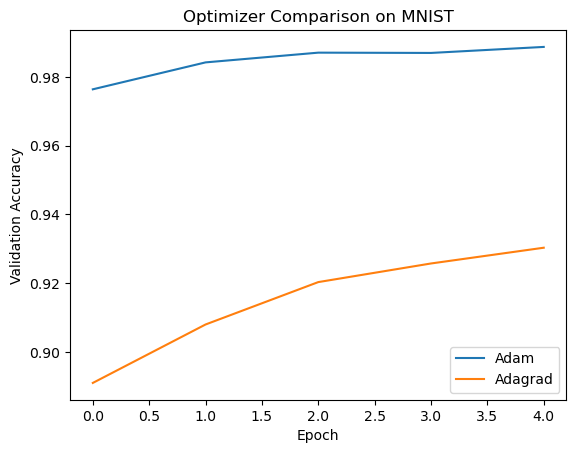

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


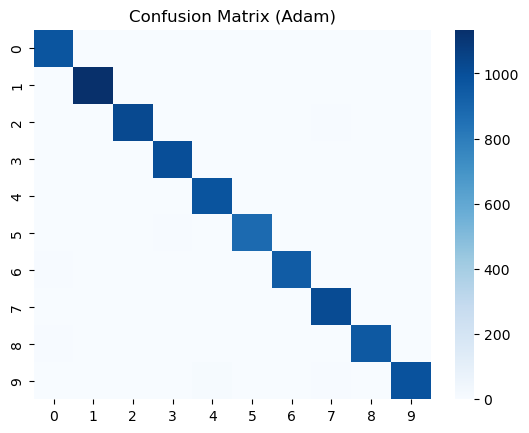

Precision: 0.9890122203105116
Recall: 0.9887764721932643
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


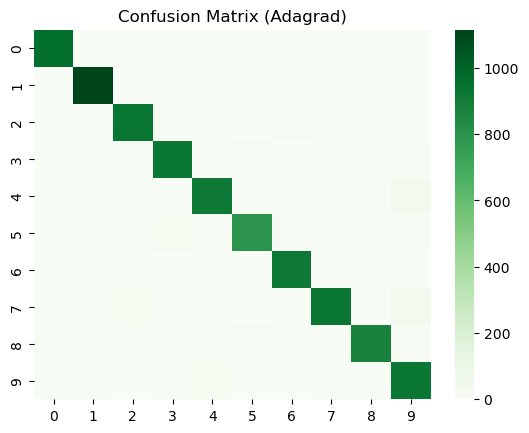

Adagrad Precision: 0.9316720325718155
Adagrad Recall: 0.9313357049020079


In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# with np.load(r"C:\Users\anupk\Downloads\mnist.npz") as data:
#     x = np.concatenate([data['x_train'], data['x_test']], axis=0)
#     y = np.concatenate([data['y_train'], data['y_test']], axis=0)
#  x = x / 255.0
# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "mnist/train", image_size=(28,28), color_mode="grayscale", batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "mnist/test", image_size=(28,28), color_mode="grayscale", batch_size=32)
# x_train, y_train = np.concatenate([x for x, y in train_ds]), np.concatenate([y for x, y in train_ds])
# x_test, y_test = np.concatenate([x for x, y in test_ds]), np.concatenate([y for x, y in test_ds])

# x_train = np.load("x_train.npy")
# y_train = np.load("y_train.npy")
# x_test  = np.load("x_test.npy")
# y_test  = np.load("y_test.npy")

# Normalize & reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# ===============================
# CNN MODEL
# ===============================
def build_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ===============================
# TRAIN WITH ADAM
# ===============================
model_adam = build_model(tf.keras.optimizers.Adam())
hist_adam = model_adam.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    verbose=0
)

# ===============================
# TRAIN WITH ADAGRAD
# ===============================
model_adagrad = build_model(tf.keras.optimizers.Adagrad())
hist_adagrad = model_adagrad.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    verbose=0
)

# ===============================
# PLOT ACCURACY
# ===============================
plt.plot(hist_adam.history['val_accuracy'], label="Adam")
plt.plot(hist_adagrad.history['val_accuracy'], label="Adagrad")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Optimizer Comparison on MNIST")
plt.legend()
plt.show()

# ===============================
# EVALUATION (ADAM MODEL)
# ===============================
y_pred = np.argmax(model_adam.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix (Adam)")
plt.show()

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)

# ===============================
# EVALUATION – ADAGRAD MODEL
# ===============================
y_pred_adagrad = np.argmax(model_adagrad.predict(x_test), axis=1)

cm_adagrad = confusion_matrix(y_test, y_pred_adagrad)
sns.heatmap(cm_adagrad, cmap="Greens")
plt.title("Confusion Matrix (Adagrad)")
plt.show()

precision_adagrad = precision_score(y_test, y_pred_adagrad, average='macro')
recall_adagrad = recall_score(y_test, y_pred_adagrad, average='macro')

print("Adagrad Precision:", precision_adagrad)
print("Adagrad Recall:", recall_adagrad)

In [ ]:
# Build a multiclass image categorization CNN network which correctly classifies different categories of images in the dataset.
# ( Fashion Mnist dataset.) 
# •	Split original dataset to train and test set 
# •	Build CNN Model
# •	Generate the accuracy of the built model using RMSProp and SGDOptimizer.
# •	Perform hyperparameter tuning to increase the accuracy of the CNN.
# •	Compare performance of different optimizer on Cloth categorization.
# •	Plot training vs validation loss
# •	Evaluate the model using confusion matrix, precision.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 17s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


C:\Users\anupk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


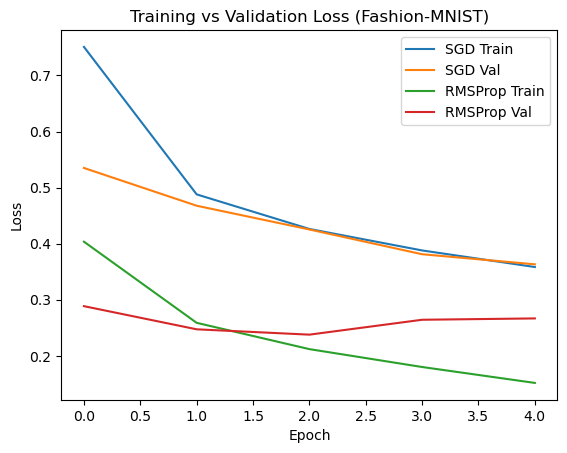

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


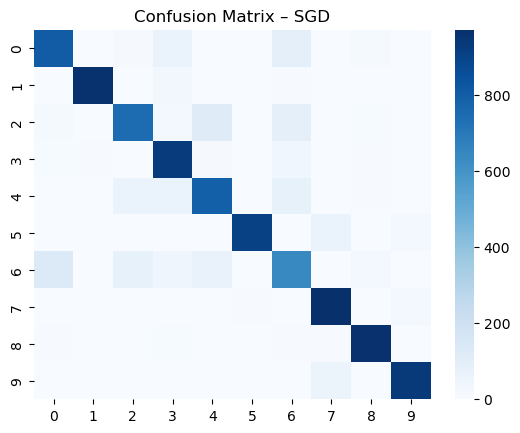

Precision (SGD): 0.8673045612042957
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


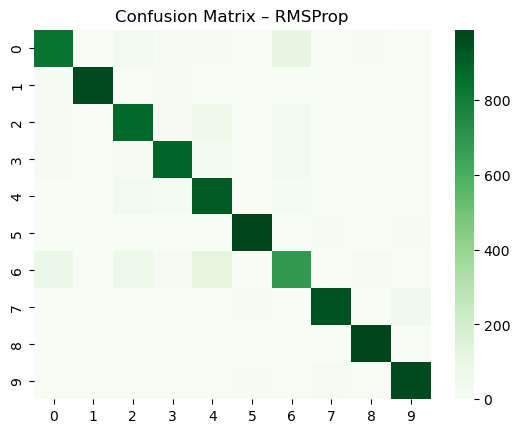

Precision (RMSProp): 0.9064201155894281


In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score
import seaborn as sns

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# OPTION 2️⃣ LOAD FROM LOCAL FOLDER (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "fashion_mnist/train", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "fashion_mnist/test", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])

# Normalize & reshape
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# ===============================
# CNN MODEL
# ===============================
def build_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ===============================
# HYPERPARAMETER TUNING
# ===============================
sgd_opt = tf.keras.optimizers.SGD(learning_rate=0.01)
rms_opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# ===============================
# TRAIN WITH SGD
# ===============================
model_sgd = build_model(sgd_opt)
hist_sgd = model_sgd.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    verbose=0
)

# ===============================
# TRAIN WITH RMSPROP
# ===============================
model_rms = build_model(rms_opt)
hist_rms = model_rms.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    verbose=0
)

# ===============================
# PLOT TRAINING vs VALIDATION LOSS
# ===============================
plt.plot(hist_sgd.history['loss'], label="SGD Train")
plt.plot(hist_sgd.history['val_loss'], label="SGD Val")
plt.plot(hist_rms.history['loss'], label="RMSProp Train")
plt.plot(hist_rms.history['val_loss'], label="RMSProp Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (Fashion-MNIST)")
plt.legend()
plt.show()

# ===============================
# EVALUATION – SGD
# ===============================
y_pred_sgd = np.argmax(model_sgd.predict(x_test), axis=1)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm_sgd, cmap="Blues")
plt.title("Confusion Matrix – SGD")
plt.show()
print("Precision (SGD):", precision_score(y_test, y_pred_sgd, average='macro'))

# ===============================
# EVALUATION – RMSPROP
# ===============================
y_pred_rms = np.argmax(model_rms.predict(x_test), axis=1)
cm_rms = confusion_matrix(y_test, y_pred_rms)
sns.heatmap(cm_rms, cmap="Greens")
plt.title("Confusion Matrix – RMSProp")
plt.show()
print("Precision (RMSProp):", precision_score(y_test, y_pred_rms, average='macro'))


In [52]:
# 1. Implement CNN and compare its performance using different optimizers
# Take the MNIST dataset
# b) Initialize a neural network basic layers with random weights.
# c) Perform practical analysis of optimizers on MNIST dataset keeping batch size, and epochs same but with different optimizers.
# d) Compare the results by choosing 5 different optimizers [ SGD, Adadelta, Adagrad, Adam, RMSprop] on a simple neural network


C:\Users\anupk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


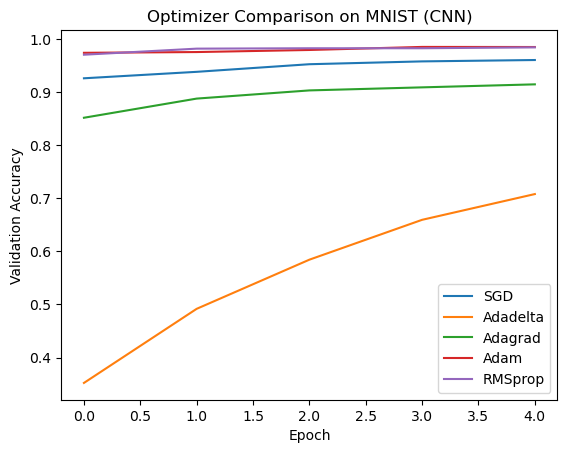

In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# x_train = np.load("x_train.npy")
# y_train = np.load("y_train.npy")
# x_test  = np.load("x_test.npy")
# y_test  = np.load("y_test.npy")

# OPTION 2️⃣ LOAD FROM LOCAL FOLDER (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "fashion_mnist/train", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "fashion_mnist/test", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])

# Normalize & reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# ===============================
# CNN MODEL
# ===============================
def build_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, activation='relu',
                               input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ===============================
# OPTIMIZERS
# ===============================
optimizers = {
    "SGD": tf.keras.optimizers.SGD(),
    "Adadelta": tf.keras.optimizers.Adadelta(),
    "Adagrad": tf.keras.optimizers.Adagrad(),
    "Adam": tf.keras.optimizers.Adam(),
    "RMSprop": tf.keras.optimizers.RMSprop()
}

histories = {}

# ===============================
# TRAINING (SAME EPOCHS & BATCH)
# ===============================
for name, opt in optimizers.items():
    model = build_model(opt)
    histories[name] = model.fit(
        x_train, y_train,
        validation_split=0.2,
        epochs=5,
        batch_size=32,
        verbose=0
    )

# ===============================
# ACCURACY COMPARISON
# ===============================
for name, hist in histories.items():
    plt.plot(hist.history['val_accuracy'], label=name)

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Optimizer Comparison on MNIST (CNN)")
plt.legend()
plt.show()


In [ ]:
# •	Load the CIFAR-10 image dataset.
# •	Split the dataset into training and testing sets.
# •	Design a CNN model for object classification.
# •	Train and evaluate the model.
# •	Plot accuracy and loss curves.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# OPTION 2️⃣ LOAD FROM LOCAL FOLDER (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(     
#     "cifar10/train", image_size=(32,32), batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "cifar10/test", image_size=(32,32), batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])
#  agar ye nhi chala toh niche wala dekho loading wala part 
# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# ===============================
# CNN MODEL
# ===============================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ===============================
# TRAIN & EVALUATE
# ===============================
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=0
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)

# ===============================
# PLOTS: ACCURACY & LOSS
# ===============================
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve (CIFAR-10)")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve (CIFAR-10)")
plt.legend()
plt.show()


In [ ]:
# •	Use alpaca dataset 
# •	CNN must include : Convolution layer, Pooling layer, Flatten layer,Dense layer
# Plot:
# •	Accuracy vs Epochs
# •	Loss (Error) vs Epochs

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = (64,64)
BATCH = 32

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS – EXAM DEMO)
# (Illustrative – alpaca-style binary dataset)
# dataset = tfds.load("alpaca", as_supervised=True)

# OPTION 2️⃣ LOAD FROM LOCAL FOLDER (COMMENTED – REAL ALPACA DATASET)
# Folder structure:
# alpaca/
#   train/
#     alpaca/
#     not_alpaca/
#   test/
#     alpaca/
#     not_alpaca/

# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "alpaca/train", image_size=IMG_SIZE, batch_size=BATCH)

# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "alpaca/test", image_size=IMG_SIZE, batch_size=BATCH)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "alpaca",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "alpaca",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH
)

# Normalize
train_ds = train_ds.map(lambda x,y: (x/255.0, y))
test_ds = test_ds.map(lambda x,y: (x/255.0, y))

# ===============================
# CNN MODEL
# ===============================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='relu',
                           input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ===============================
# TRAIN MODEL
# ===============================
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5,
    verbose=0
)

# ===============================
# PLOTS
# ===============================
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs (Alpaca CNN)")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs (Alpaca CNN)")
plt.legend()
plt.show()


In [ ]:
# 1.	Load the Corn 3-Classes image dataset.
# 2.	Preprocess the images:
#   a.	   Resize images to a fixed size (e.g., 224×224)
#   b.	   Normalize pixel values.
# 3.	Split the dataset into training and testing sets.
# 4.	Create a CNN model using:
#   a.	     Convolution layer
#   b.	      Max Pooling layer
#   c.	     Flatten layer
#   d.	      Dense layer
# 5.	Train the CNN model for multi-class classification.
# 6.	Test the model on unseen images.
# 7.	Plot graphs:
#   a.	      Training vs Validation Accuracy
#   b.	      Training vs Validation Loss (Error)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

IMG_SIZE = (224,224)
BATCH = 32

# ===============================
# DATASET LOADING (SINGLE FOLDER)
# ===============================

# Folder structure:
# corn/
#   class1/
#   class2/
#   class3/

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "corn",
    image_size=IMG_SIZE,
    batch_size=BATCH,
    validation_split=0.2,     # auto split
    subset="training",
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "corn",
    image_size=IMG_SIZE,
    batch_size=BATCH,
    validation_split=0.2,
    subset="validation",
    seed=123
)

num_classes = len(dataset.class_names)

# Normalize
dataset = dataset.map(lambda x,y: (x/255.0, y))
val_ds = val_ds.map(lambda x,y: (x/255.0, y))

# ===============================
# CNN MODEL
# ===============================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ===============================
# TRAIN MODEL
# ===============================
history = model.fit(
    dataset,
    validation_data=val_ds,
    epochs=5,
    verbose=0
)

# ===============================
# TEST ON UNSEEN IMAGES (VALIDATION)
# ===============================
val_loss, val_acc = model.evaluate(val_ds, verbose=0)
print("Validation Accuracy:", val_acc)

# ===============================
# PLOTS
# ===============================

# Accuracy
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Corn CNN)")
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (Corn CNN)")
plt.legend()
plt.show()


In [ ]:
# Implement Self Organizing Map for anomaly Detection
# 1.	Use Credit Card Applications Dataset:
# 2.	Detect fraud customers in the dataset using SOM and perform hyperparameter tuning
# 3.	Show map and use markers to distinguish frauds.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM CSV (USE THIS)
data = pd.read_csv("Credit_Card_Applications.csv")

X = data.iloc[:, :-1].values     # features
y = data.iloc[:, -1].values      # approval (0/1)

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# data = pd.read_csv(r"C:\data\credit_card.csv")
# X = data.iloc[:, :-1].values
# y = data.iloc[:, -1].values

# Normalize
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

# ===============================
# SOM + HYPERPARAMETERS
# ===============================
som_x, som_y = 10, 10          # map size (tuning)
sigma = 1.0
lr = 0.5

som = MiniSom(
    x=som_x,
    y=som_y,
    input_len=X.shape[1],
    sigma=sigma,
    learning_rate=lr
)

som.random_weights_init(X)
som.train_random(X, num_iteration=100)

# ===============================
# VISUALIZATION
# ===============================
plt.figure(figsize=(7,7))
plt.pcolor(som.distance_map(), cmap='coolwarm')
plt.colorbar(label="Distance (Anomaly Score)")

for i, x in enumerate(X):
    w = som.winner(x)
    if y[i] == 0:   # not approved → fraud
        plt.text(w[0]+0.5, w[1]+0.5, 'F',
                 color='red', ha='center', va='center')
    else:
        plt.text(w[0]+0.5, w[1]+0.5, 'N',
                 color='green', ha='center', va='center')

plt.title("SOM Fraud Detection Map")
plt.show()

# ===============================
# FRAUD CUSTOMERS
# ===============================
mappings = som.win_map(X)
frauds = np.concatenate(
    [mappings[cell] for cell in mappings if som.distance_map()[cell] > 0.9],
    axis=0
)

frauds = sc.inverse_transform(frauds)
print("Detected Fraud Customers (sample):")
print(frauds[:5])


In [ ]:
# Implement the NAND Boolean Logic Gate using a Perceptron Neural Network.
# •	Inputs: x1, x2, bias
# •	Train using perceptron learning rule
# •	Output: y
# •	Display final weights and bias
# •	Verify truth table results


In [54]:
# Inputs and target outputs for NAND gate
inputs = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

targets = [1, 1, 1, 0]   # NAND outputs

# Initialize weights and bias
w1 = 0.0
w2 = 0.0
b = 0.0

learning_rate = 0.1
epochs = 10

def perceptron(x1, x2, w1, w2, b):
    z = w1*x1 + w2*x2 + b
    return 1 if z >= 0 else 0

# -------------------------------
# Training using Perceptron Rule
# -------------------------------
for epoch in range(epochs):
    for (x1, x2), target in zip(inputs, targets):
        y = perceptron(x1, x2, w1, w2, b)
        error = target - y

        # Update weights and bias
        w1 = w1 + learning_rate * error * x1
        w2 = w2 + learning_rate * error * x2
        b  = b  + learning_rate * error

# -------------------------------
# Testing / Verification
# -------------------------------
print("NAND Gate Output:")
for x1, x2 in inputs:
    print(f"{x1} NAND {x2} = {perceptron(x1, x2, w1, w2, b)}")

print("\nFinal Weights and Bias:")
print("w1 =", w1)
print("w2 =", w2)
print("bias =", b)


NAND Gate Output:
0 NAND 0 = 1
0 NAND 1 = 1
1 NAND 0 = 1
1 NAND 1 = 0

Final Weights and Bias:
w1 = -0.2
w2 = -0.1
bias = 0.2


In [55]:
# Use the Iris Dataset
# •	Normalize the input features
# •	Perform Min–Max scaling
# •	Visualize original vs normalized features


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY
# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data
# feature_names = iris.feature_names

# OPTION 2️⃣ LOAD FROM LOCAL PC (RECOMMENDED FOR REAL DATASETS)
data = pd.read_csv("Iris.csv")

X = data.iloc[:, :-1].values        # all feature columns
feature_names = data.columns[:-1]  # feature names

# ===============================
# MIN–MAX NORMALIZATION
# ===============================
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# ===============================
# VISUALIZATION
# ===============================
plt.figure(figsize=(10,4))

# Original features
plt.subplot(1,2,1)
plt.boxplot(X)
plt.title("Original Features")
plt.xticks(range(1, X.shape[1]+1), feature_names, rotation=45)

# Normalized features
plt.subplot(1,2,2)
plt.boxplot(X_norm)
plt.title("Normalized Features (Min–Max)")
plt.xticks(range(1, X.shape[1]+1), feature_names, rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Implement Multi-output Perceptron for
# •	AND gate
# •	OR gate
# •	Display weight matrix and bias vector


In [56]:
# Inputs
inputs = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

# Targets: [AND, OR]
targets = [
    (0, 0),
    (0, 1),
    (0, 1),
    (1, 1)
]

# Weight matrix (2 inputs × 2 outputs)
# Column 0 → AND, Column 1 → OR
W = [
    [1, 1],   # weights for x1
    [1, 1]    # weights for x2
]

# Bias vector
b = [-1.5, -0.5]   # [AND bias, OR bias]

def perceptron(x1, x2):
    outputs = []
    for j in range(2):  # two outputs
        z = x1 * W[0][j] + x2 * W[1][j] + b[j]
        y = 1 if z >= 0 else 0
        outputs.append(y)
    return outputs

# Test Multi-output Perceptron
print("x1 x2 | AND OR")
for x1, x2 in inputs:
    y_and, y_or = perceptron(x1, x2)
    print(f"{x1}  {x2}  |  {y_and}   {y_or}")

print("\nFinal Weight Matrix (W):")
print(W)

print("\nFinal Bias Vector (b):")
print(b)


x1 x2 | AND OR
0  0  |  0   0
0  1  |  0   1
1  0  |  0   1
1  1  |  1   1

Final Weight Matrix (W):
[[1, 1], [1, 1]]

Final Bias Vector (b):
[-1.5, -0.5]


In [ ]:
# Load Flowers Dataset
# •	Train CNN model with 3 kernals.
# •	Plot training and validation accuracy using graph.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

IMG_SIZE = (224,224)
BATCH = 32

# ===============================
# DATASET LOADING (SINGLE DATASET)
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
train_ds = tfds.load(
    "tf_flowers",
    split="train[:80%]",
    as_supervised=True
)

val_ds = tfds.load(
    "tf_flowers",
    split="train[80%:]",
    as_supervised=True
)

# OPTION 2️⃣ LOAD FROM LOCAL FOLDER (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "flowers", image_size=IMG_SIZE,
#     validation_split=0.2, subset="training",
#     seed=123, batch_size=BATCH)
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "flowers", image_size=IMG_SIZE,
#     validation_split=0.2, subset="validation",
#     seed=123, batch_size=BATCH)

# Preprocess
def preprocess(x, y):
    return tf.image.resize(x, IMG_SIZE)/255.0, y

train_ds = train_ds.map(preprocess).batch(BATCH)
val_ds = val_ds.map(preprocess).batch(BATCH)

# ===============================
# CNN MODEL (3 KERNELS)
# ===============================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(3, 3, activation='relu',
                           input_shape=(224,224,3)),  # 3 kernels
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ===============================
# TRAIN MODEL
# ===============================
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    verbose=0
)

# ===============================
# PLOT ACCURACY
# ===============================
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (Flowers CNN)")
plt.legend()
plt.show()


In [ ]:
# Implement perceptron
# •	Train on AND,OR gate
# •	Compare convergence with normal perceptron


In [57]:
# Inputs
inputs = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

targets_and = [0, 0, 0, 1]
targets_or  = [0, 1, 1, 1]

lr = 0.1
epochs = 20

def train_perceptron(targets):
    w1, w2, b = 0.0, 0.0, 0.0
    for epoch in range(epochs):
        total_error = 0
        for (x1, x2), t in zip(inputs, targets):
            z = w1*x1 + w2*x2 + b
            y = 1 if z >= 0 else 0
            error = t - y
            total_error += abs(error)

            # Perceptron learning rule
            w1 += lr * error * x1
            w2 += lr * error * x2
            b  += lr * error
        if total_error == 0:
            return epoch + 1, w1, w2, b
    return epochs, w1, w2, b
# Train AND and OR Perceptrons
epochs_and, w1a, w2a, ba = train_perceptron(targets_and)
epochs_or,  w1o, w2o, bo = train_perceptron(targets_or)

print("AND Gate:")
print("Converged in epochs:", epochs_and)
print("Weights:", w1a, w2a, "Bias:", ba)

print("\nOR Gate:")
print("Converged in epochs:", epochs_or)
print("Weights:", w1o, w2o, "Bias:", bo)
# OR gate converges faster AND gate takes more epochs

AND Gate:
Converged in epochs: 4
Weights: 0.2 0.1 Bias: -0.20000000000000004

OR Gate:
Converged in epochs: 4
Weights: 0.1 0.1 Bias: -0.1


In [ ]:
# Use Iris Dataset
# •	Encode using Autoencoder (3 neurons)
# •	Decode and reconstruct
# •	Plot original vs reconstructed data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# ===============================
# DATASET LOADING
# ===============================

# OPTION 2️⃣ LOAD FROM LOCAL PC (RECOMMENDED FOR REAL DATASETS)
data = pd.read_csv("Iris.csv")

X = data.iloc[:, :-1].values        # all feature columns
feature_names = data.columns[:-1]  # feature names

# OPTION 1️⃣ LOAD FROM LIBRARY (COMMENTED)
# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data
# feature_names = iris.feature_names

# Normalize
X = MinMaxScaler().fit_transform(X)

# ===============================
# AUTOENCODER MODEL (3 NEURONS)
# ===============================
input_layer = Input(shape=(X.shape[1],))
encoded = Dense(3, activation='relu')(input_layer)     # Encoder
decoded = Dense(X.shape[1], activation='sigmoid')(encoded)  # Decoder

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# ===============================
# TRAIN AUTOENCODER
# ===============================
autoencoder.fit(X, X, epochs=50, batch_size=16, verbose=0)

# ===============================
# RECONSTRUCTION
# ===============================
X_reconstructed = autoencoder.predict(X)

# ===============================
# VISUALIZATION
# ===============================
plt.figure(figsize=(10,4))

# Original data
plt.subplot(1,2,1)
plt.boxplot(X)
plt.title("Original Iris Features")
plt.xticks(range(1,5), feature_names, rotation=45)

# Reconstructed data
plt.subplot(1,2,2)
plt.boxplot(X_reconstructed)
plt.title("Reconstructed Features (Autoencoder)")
plt.xticks(range(1,5), feature_names, rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Use dataset with initial values X = [1.0, 2.0], Y = [0.5, 1.5]
# •	Initialize neural network with random weights
# •	Compute output using linear activation
# •	Calculate MAE and MSE
# •	Plot loss surface (weight vs loss)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# DATASET
# ===============================
X = np.array([1.0, 2.0])
Y = np.array([0.5, 1.5])

# ===============================
# INITIALIZATION
# ===============================
w = np.random.rand()   # random weight
b = np.random.rand()   # random bias

# ===============================
# FORWARD PROPAGATION (LINEAR)
# ===============================
Y_pred = w * X + b

# ===============================
# LOSS CALCULATION
# ===============================
mae = np.mean(np.abs(Y - Y_pred))
mse = np.mean((Y - Y_pred) ** 2)

print("Weight:", w)
print("Bias:", b)
print("MAE:", mae)
print("MSE:", mse)

# ===============================
# LOSS SURFACE (WEIGHT vs LOSS)
# ===============================
weights = np.linspace(-2, 2, 50)
losses = []

for wi in weights:
    y_hat = wi * X + b
    loss = np.mean((Y - y_hat) ** 2)
    losses.append(loss)

plt.plot(weights, losses)
plt.xlabel("Weight")
plt.ylabel("Loss (MSE)")
plt.title("Loss Surface (Weight vs MSE)")
plt.show()


In [ ]:
# Use CIFAR-10 Dataset
# •	Train CNN with and without data augmentation
# •	Augmentations: rotate, zoom, distort images
# •	Compare validation accuracy and loss and plot using Graph


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# OPTION 2️⃣ LOAD FROM LOCAL FOLDER (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "cifar10/train", image_size=(32,32), batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "cifar10/test", image_size=(32,32), batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# ===============================
# CNN MODEL
# ===============================
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu',
                               input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ===============================
# MODEL WITHOUT AUGMENTATION
# ===============================
model_no_aug = build_model()
hist_no_aug = model_no_aug.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=0
)

# ===============================
# DATA AUGMENTATION
# ===============================
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2   # distortion
)

# ===============================
# MODEL WITH AUGMENTATION
# ===============================
model_aug = build_model()
hist_aug = model_aug.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    epochs=5,
    verbose=0
)

# ===============================
# PLOTS: ACCURACY
# ===============================
plt.plot(hist_no_aug.history['val_accuracy'], label="No Aug - Val Acc")
plt.plot(hist_aug.history['val_accuracy'], label="Aug - Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison (CIFAR-10)")
plt.legend()
plt.show()

# ===============================
# PLOTS: LOSS
# ===============================
plt.plot(hist_no_aug.history['val_loss'], label="No Aug - Val Loss")
plt.plot(hist_aug.history['val_loss'], label="Aug - Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Comparison (CIFAR-10)")
plt.legend()
plt.show()


In [ ]:
# Implement XOR gate using 2-layer Neural Network
# •	Use Adadelta optimizer
# •	Plot accuracy vs epoch


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ===============================
# XOR DATASET
# ===============================
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype=float)

y = np.array([0,1,1,0], dtype=float)

# ===============================
# 2-LAYER NEURAL NETWORK
# ===============================
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(2,)),  # Hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')                  # Output layer
])

model.compile(
    optimizer=tf.keras.optimizers.Adadelta(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# ===============================
# TRAIN MODEL
# ===============================
history = model.fit(
    X, y,
    epochs=100,
    verbose=0
)

# ===============================
# PLOT ACCURACY vs EPOCH
# ===============================
plt.plot(history.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch (XOR using Adadelta)")
plt.show()


In [ ]:
# Fashion-MNIST Classification
# •	CNN with RMSProp & Adam
# •	Compare confusion matrices


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# OPTION 2️⃣ LOAD FROM LOCAL FOLDER (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "fashion_mnist/train", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "fashion_mnist/test", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])

# Normalize & reshape
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# ===============================
# CNN MODEL
# ===============================
def build_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu',
                               input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ===============================
# TRAIN WITH RMSPROP
# ===============================
model_rms = build_model(tf.keras.optimizers.RMSprop())
model_rms.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)

# ===============================
# TRAIN WITH ADAM
# ===============================
model_adam = build_model(tf.keras.optimizers.Adam())
model_adam.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)

# ===============================
# CONFUSION MATRIX – RMSPROP
# ===============================
y_pred_rms = np.argmax(model_rms.predict(x_test), axis=1)
cm_rms = confusion_matrix(y_test, y_pred_rms)

sns.heatmap(cm_rms, cmap="Blues")
plt.title("Confusion Matrix – RMSProp")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===============================
# CONFUSION MATRIX – ADAM
# ===============================
y_pred_adam = np.argmax(model_adam.predict(x_test), axis=1)
cm_adam = confusion_matrix(y_test, y_pred_adam)

sns.heatmap(cm_adam, cmap="Greens")
plt.title("Confusion Matrix – Adam")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Implement the backpropagation algorithm.
# 1.	Take Iris Dataset
# 2.	Initialize a neural network with random weights. 
# 3.	Calculate error
# 4.	Perform multiple iterations of NN
# 5.	Update weights accordingly.
# 6.	Plot accuracy for iterations and note the results.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ===============================
# DATASET LOADING
# ===============================

# OPTION 2️⃣ LOAD FROM LOCAL PC (RECOMMENDED .csv)
data = pd.read_csv("Iris.csv")

X = data.iloc[:, :-1].values
y = (data.iloc[:, -1] == data.iloc[:, -1].unique()[0]).astype(int).values.reshape(-1,1)

# OPTION 1️⃣ LOAD FROM LIBRARY (COMMENTED)
# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data
# y = (iris.target == 0).astype(int).reshape(-1,1)

# Normalize
X = MinMaxScaler().fit_transform(X)

# ===============================
# NN INITIALIZATION
# ===============================
np.random.seed(1)
W1 = np.random.rand(X.shape[1], 3)   # input → hidden
b1 = np.random.rand(1,3)
W2 = np.random.rand(3,1)             # hidden → output
b2 = np.random.rand(1,1)

lr = 0.1
epochs = 50
acc_list = []

# Activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

# ===============================
# BACKPROPAGATION TRAINING
# ===============================
for _ in range(epochs):

    # Forward pass
    h_in = np.dot(X, W1) + b1
    h_out = sigmoid(h_in)

    o_in = np.dot(h_out, W2) + b2
    y_pred = sigmoid(o_in)

    # Error
    error = y - y_pred

    # Backpropagation
    d_out = error * sigmoid_deriv(y_pred)
    dW2 = np.dot(h_out.T, d_out)
    db2 = np.sum(d_out, axis=0, keepdims=True)

    d_hidden = np.dot(d_out, W2.T) * sigmoid_deriv(h_out)
    dW1 = np.dot(X.T, d_hidden)
    db1 = np.sum(d_hidden, axis=0, keepdims=True)

    # Update weights
    W2 += lr * dW2
    b2 += lr * db2
    W1 += lr * dW1
    b1 += lr * db1

    # Accuracy
    y_class = (y_pred >= 0.5).astype(int)
    acc = np.mean(y_class == y)
    acc_list.append(acc)

print("Final Accuracy:", acc_list[-1])
plt.plot(acc_list)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iterations (Backpropagation)")
plt.show()


In [ ]:
# Build a multiclass image categorization of CNN network which correctly classifies different categories of images in the dataset.
# 1. Take Flower dataset 
# 2. Split original dataset to train and test set 
# 3. Build CNN Model
# 4. Generate the accuracy of the built model using any optimizer.
# 5. Compare performance of different optimizers on Flower categorization.


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

IMG_SIZE = (224,224)
BATCH = 32

# ===============================
# DATASET LOADING
# ===============================

# OPTION 2️⃣ LOAD FROM LOCAL PC (RECOMMENDED)
# Folder structure:
# flowers/
#   daisy/
#   dandelion/
#   roses/
#   sunflowers/
#   tulips/

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "flowers",
    image_size=IMG_SIZE,
    batch_size=BATCH,
    validation_split=0.2,
    subset="training",
    seed=123
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "flowers",
    image_size=IMG_SIZE,
    batch_size=BATCH,
    validation_split=0.2,
    subset="validation",
    seed=123
)

num_classes = len(train_ds.class_names)

# OPTION 1️⃣ LOAD FROM LIBRARY (COMMENTED)
# train_ds = tfds.load("tf_flowers", split="train[:80%]", as_supervised=True)
# test_ds = tfds.load("tf_flowers", split="train[80%:]", as_supervised=True)

# Normalize
train_ds = train_ds.map(lambda x,y: (x/255.0, y))
test_ds = test_ds.map(lambda x,y: (x/255.0, y))

# ===============================
# CNN MODEL
# ===============================
def build_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu',
                               input_shape=(224,224,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ===============================
# OPTIMIZERS
# ===============================
optimizers = {
    "Adam": tf.keras.optimizers.Adam(),
    "SGD": tf.keras.optimizers.SGD(),
    "RMSprop": tf.keras.optimizers.RMSprop()
}

histories = {}

# ===============================
# TRAIN MODELS
# ===============================
for name, opt in optimizers.items():
    model = build_model(opt)
    histories[name] = model.fit(
        train_ds,
        validation_data=test_ds,
        epochs=5,
        verbose=0
    )

# ===============================
# ACCURACY COMPARISON
# ===============================
for name, hist in histories.items():
    plt.plot(hist.history['val_accuracy'], label=name)

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Optimizer Comparison on Flower Dataset")
plt.legend()
plt.show()


In [ ]:
# Train a small neural network (dataset – Cifar- 100 Classification) 
# Compare the optimizers:
# •	Adagrad 
# •	SGD 
# •	Adam
# Plot:
# •	Training loss vs epochs
# •	Accuracy vs epochs


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# OPTION 2️⃣ LOAD FROM LOCAL FOLDER (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "cifar100/train", image_size=(32,32), batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "cifar100/test", image_size=(32,32), batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# ===============================
# SMALL CNN MODEL
# ===============================
def build_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu',
                               input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(100, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ===============================
# OPTIMIZERS
# ===============================
optimizers = {
    "Adagrad": tf.keras.optimizers.Adagrad(),
    "SGD": tf.keras.optimizers.SGD(),
    "Adam": tf.keras.optimizers.Adam()
}

histories = {}

# ===============================
# TRAIN MODELS (SAME EPOCHS)
# ===============================
for name, opt in optimizers.items():
    model = build_model(opt)
    histories[name] = model.fit(
        x_train, y_train,
        validation_split=0.2,
        epochs=5,
        batch_size=32,
        verbose=0
    )

# ===============================
# PLOT: TRAINING LOSS vs EPOCHS
# ===============================
for name, hist in histories.items():
    plt.plot(hist.history['loss'], label=name)

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epochs (CIFAR-100)")
plt.legend()
plt.show()

# ===============================
# PLOT: ACCURACY vs EPOCHS
# ===============================
for name, hist in histories.items():
    plt.plot(hist.history['val_accuracy'], label=name)

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy vs Epochs (CIFAR-100)")
plt.legend()
plt.show()


In [ ]:
# •	Use IRIS Dataset 
# •	Train a model with and without data augmentation (horizontal flip, rotation, noise).
# •	Compare generalization performance on the validation set. (Accuracy & Error)
# •	Plot accuracy vs epochs
# •	Plot loss vs epochs


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# ===============================
# DATASET LOADING
# ===============================

# OPTION 2️⃣ LOAD FROM LOCAL PC (RECOMMENDED)
data = pd.read_csv("Iris.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].astype('category').cat.codes.values

# OPTION 1️⃣ LOAD FROM LIBRARY (COMMENTED)
# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data
# y = iris.target

# Normalize
X = MinMaxScaler().fit_transform(X)

# ===============================
# DATA AUGMENTATION (TABULAR)
# ===============================
def augment_data(X):
    noise = X + 0.05 * np.random.normal(size=X.shape)   # noise
    shuffled = np.roll(X, shift=1, axis=1)              # feature shift
    return np.vstack([X, noise, shuffled])

X_aug = augment_data(X)
y_aug = np.hstack([y, y, y])

# ===============================
# MODEL
# ===============================
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ===============================
# TRAIN WITHOUT AUGMENTATION
# ===============================
model_no_aug = build_model()
hist_no_aug = model_no_aug.fit(
    X, y,
    validation_split=0.2,
    epochs=50,
    verbose=0
)

# ===============================
# TRAIN WITH AUGMENTATION
# ===============================
model_aug = build_model()
hist_aug = model_aug.fit(
    X_aug, y_aug,
    validation_split=0.2,
    epochs=50,
    verbose=0
)

# ===============================
# PLOT ACCURACY
# ===============================
plt.plot(hist_no_aug.history['val_accuracy'], label="No Aug")
plt.plot(hist_aug.history['val_accuracy'], label="With Aug")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy vs Epochs (Iris)")
plt.legend()
plt.show()

# ===============================
# PLOT LOSS
# ===============================
plt.plot(hist_no_aug.history['val_loss'], label="No Aug")
plt.plot(hist_aug.history['val_loss'], label="With Aug")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Loss vs Epochs (Iris)")
plt.legend()
plt.show()


In [ ]:
# Build a small CNN for MNIST digits dataset
# •	Split dataset into train/test
# •	Use 2 convolution layers + pooling + dense
# •	Metrics / Plots: Accuracy, Confusion Matrix, Precision & Recall, plot training vs validation accuracy and loss
# Task 2: Compare Adam vs SGD optimizer
# •	Metrics / Plots: Plot training loss & accuracy for each optimizer


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "mnist/train", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "mnist/test", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])

# Normalize & reshape
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# ===============================
# CNN MODEL
# ===============================
def build_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ===============================
# TRAIN WITH ADAM
# ===============================
model_adam = build_model(tf.keras.optimizers.Adam())
hist_adam = model_adam.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=0
)

# ===============================
# TRAIN WITH SGD
# ===============================
model_sgd = build_model(tf.keras.optimizers.SGD())
hist_sgd = model_sgd.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=0
)

# ===============================
# PLOTS: TRAIN vs VAL ACCURACY
# ===============================
plt.plot(hist_adam.history['accuracy'], label="Adam Train")
plt.plot(hist_adam.history['val_accuracy'], label="Adam Val")
plt.plot(hist_sgd.history['accuracy'], label="SGD Train")
plt.plot(hist_sgd.history['val_accuracy'], label="SGD Val")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

# ===============================
# PLOTS: TRAIN vs VAL LOSS
# ===============================
plt.plot(hist_adam.history['loss'], label="Adam Train")
plt.plot(hist_adam.history['val_loss'], label="Adam Val")
plt.plot(hist_sgd.history['loss'], label="SGD Train")
plt.plot(hist_sgd.history['val_loss'], label="SGD Val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# ===============================
# EVALUATION – ADAM
# ===============================
y_pred_adam = np.argmax(model_adam.predict(x_test), axis=1)
cm_adam = confusion_matrix(y_test, y_pred_adam)
sns.heatmap(cm_adam, cmap="Blues")
plt.title("Confusion Matrix – Adam")
plt.show()

print("Adam Precision:", precision_score(y_test, y_pred_adam, average='macro'))
print("Adam Recall:", recall_score(y_test, y_pred_adam, average='macro'))

# ===============================
# EVALUATION – SGD
# ===============================
y_pred_sgd = np.argmax(model_sgd.predict(x_test), axis=1)
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm_sgd, cmap="Greens")
plt.title("Confusion Matrix – SGD")
plt.show()

print("SGD Precision:", precision_score(y_test, y_pred_sgd, average='macro'))
print("SGD Recall:", recall_score(y_test, y_pred_sgd, average='macro'))


In [ ]:
# •	Calculate and plot all activation functions (Sigmoid and tanh) for input ranging in (-10, +10)
# •	Calculate and plot Derivative of given Activation function and plot also observe the behaviour of curves.
# •	Consider a target vector Y and prediction vector Ŷ. Calculate MSE and MAE.


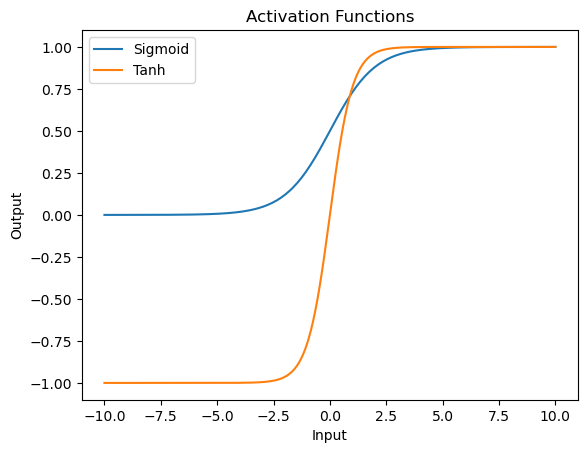

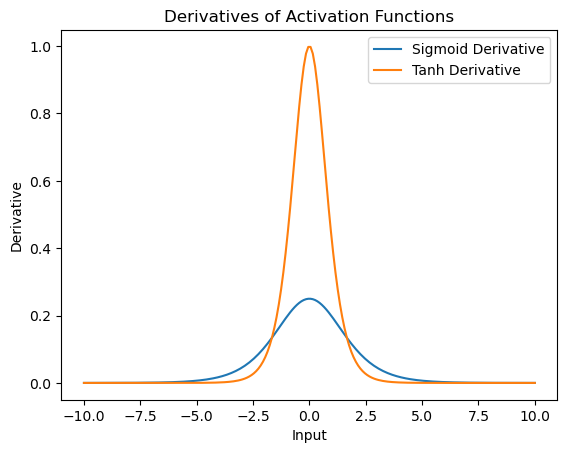

MSE: 0.08
MAE: 0.26666666666666666


In [58]:
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# INPUT RANGE
# ===============================
x = np.linspace(-10, 10, 200)

# ===============================
# ACTIVATION FUNCTIONS
# ===============================
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)

# ===============================
# DERIVATIVES
# ===============================
sigmoid_der = sigmoid * (1 - sigmoid)
tanh_der = 1 - tanh**2

# ===============================
# PLOTS: ACTIVATION FUNCTIONS
# ===============================
plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, tanh, label="Tanh")
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Activation Functions")
plt.legend()
plt.show()

# ===============================
# PLOTS: DERIVATIVES
# ===============================
plt.plot(x, sigmoid_der, label="Sigmoid Derivative")
plt.plot(x, tanh_der, label="Tanh Derivative")
plt.xlabel("Input")
plt.ylabel("Derivative")
plt.title("Derivatives of Activation Functions")
plt.legend()
plt.show()

# ===============================
# MSE & MAE CALCULATION
# ===============================
Y = np.array([1.0, 0.0, 1.0])
Y_hat = np.array([0.8, 0.2, 0.6])

mse = np.mean((Y - Y_hat)**2)
mae = np.mean(np.abs(Y - Y_hat))

print("MSE:", mse)
print("MAE:", mae)


In [ ]:
# •	Calculate and plot all activation functions ( Tanh and Relu) for input ranging in (-5, +5)
# •	Calculate and plot Derivative of given Activation function and plot also observe the behaviour of curves.
# •	Consider a target vector Y and prediction vector Ŷ. Calculate MSE and MAE.


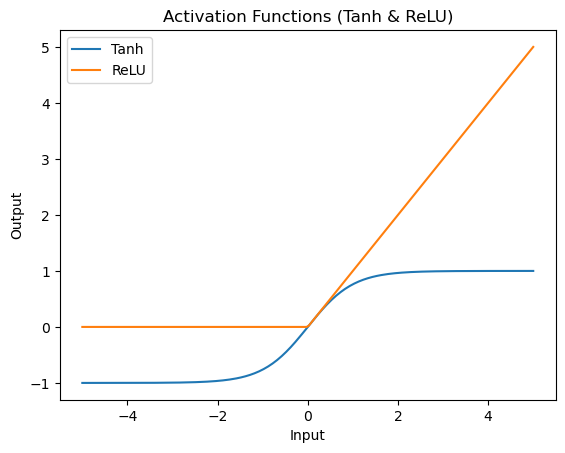

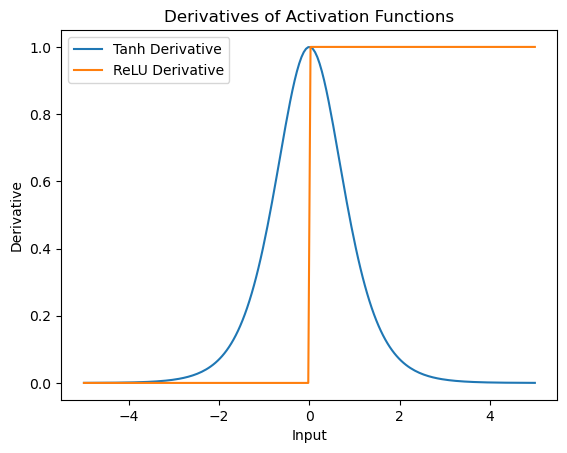

MSE: 0.11333333333333336
MAE: 0.3333333333333333


In [59]:
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# INPUT RANGE
# ===============================
x = np.linspace(-5, 5, 200)

# ===============================
# ACTIVATION FUNCTIONS
# ===============================
tanh = np.tanh(x)
relu = np.maximum(0, x)

# ===============================
# DERIVATIVES
# ===============================
tanh_der = 1 - tanh**2
relu_der = np.where(x > 0, 1, 0)

# ===============================
# PLOTS: ACTIVATION FUNCTIONS
# ===============================
plt.plot(x, tanh, label="Tanh")
plt.plot(x, relu, label="ReLU")
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Activation Functions (Tanh & ReLU)")
plt.legend()
plt.show()

# ===============================
# PLOTS: DERIVATIVES
# ===============================
plt.plot(x, tanh_der, label="Tanh Derivative")
plt.plot(x, relu_der, label="ReLU Derivative")
plt.xlabel("Input")
plt.ylabel("Derivative")
plt.title("Derivatives of Activation Functions")
plt.legend()
plt.show()

# ===============================
# MSE & MAE CALCULATION
# ===============================
Y = np.array([1.0, 0.0, 1.0])
Y_hat = np.array([0.7, 0.3, 0.6])

mse = np.mean((Y - Y_hat)**2)
mae = np.mean(np.abs(Y - Y_hat))

print("MSE:", mse)
print("MAE:", mae)


In [ ]:
# 1.	Calculate and plot all activation functions (Sigmoid, Relu and softmax) for input ranging in (-10 to +10)
# 2.	Calculate and plot Derivative of given Activation function and plot also observe the behaviour of curves.
# 3.	Consider a target vector Y and prediction vector Ŷ. Calculate MSE and MAE.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# INPUT RANGE
# ===============================
x = np.linspace(-10, 10, 200)

# ===============================
# ACTIVATION FUNCTIONS
# ===============================
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)

# Softmax (1D demonstration)
expx = np.exp(x)
softmax = expx / np.sum(expx)

# ===============================
# DERIVATIVES (EXAM-SAFE)
# ===============================
sigmoid_der = sigmoid * (1 - sigmoid)
relu_der = np.where(x > 0, 1, 0)
softmax_der = softmax * (1 - softmax)   # simplified (diagonal term)

# ===============================
# PLOT: ACTIVATION FUNCTIONS
# ===============================
plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, relu, label="ReLU")
plt.plot(x, softmax, label="Softmax")
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Activation Functions")
plt.legend()
plt.show()

# ===============================
# PLOT: DERIVATIVES
# ===============================
plt.plot(x, sigmoid_der, label="Sigmoid Derivative")
plt.plot(x, relu_der, label="ReLU Derivative")
plt.plot(x, softmax_der, label="Softmax Derivative")
plt.xlabel("Input")
plt.ylabel("Derivative")
plt.title("Derivatives of Activation Functions")
plt.legend()
plt.show()

# ===============================
# MSE & MAE CALCULATION
# ===============================
Y = np.array([1.0, 0.0, 1.0])
Y_hat = np.array([0.8, 0.3, 0.6])

mse = np.mean((Y - Y_hat) ** 2)
mae = np.mean(np.abs(Y - Y_hat))

print("MSE:", mse)
print("MAE:", mae)


In [ ]:
# Implement the AND Boolean logic gate using perceptron Neural Network. 
#     Inputs = x1, x2 and bias, weights should be fed into the perceptron with single Output = y. 
#         Display final weights and bias of each perceptron.

In [ ]:
# Inputs
inputs = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1)
]

# Weights and bias (predefined for AND gate)
w1 = 1
w2 = 1
b = -1.5

def perceptron(x1, x2):
    z = w1 * x1 + w2 * x2 + b
    return 1 if z >= 0 else 0

# Test AND gate
for x1, x2 in inputs:
    print(f"{x1} AND {x2} = {perceptron(x1, x2)}")

print("\nFinal Weights and Bias:")
print("w1 =", w1)
print("w2 =", w2)
print("bias =", b)

In [ ]:
# 1. Use the titanic Dataset 
# 2.Create an Auto Encoder and fit it with our data using 3 neurons in the dense layer
# 3. Display new reduced dimension values
# 4.Plot loss for different encoders [ Sparse Autoencoder, Noise Autoencoder]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# ===============================
# DATASET LOADING
# ===============================

# OPTION 2️⃣ LOAD FROM LOCAL PC (RECOMMENDED)
data = pd.read_csv("titanic.csv")

X = data[['Age', 'Fare']].fillna(0).values   # simple numeric features

# OPTION 1️⃣ LOAD FROM LIBRARY (COMMENTED)
# data = pd.read_csv(
#   "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
# X = data[['Age','Fare']].fillna(0).values

# Normalize
X = MinMaxScaler().fit_transform(X)

# ===============================
# SPARSE AUTOENCODER (3 NEURONS)
# ===============================
input_layer = Input(shape=(X.shape[1],))
encoded_sparse = Dense(
    3, activation='relu',
    activity_regularizer=regularizers.l1(1e-3)
)(input_layer)
decoded_sparse = Dense(X.shape[1], activation='sigmoid')(encoded_sparse)

sparse_autoencoder = Model(input_layer, decoded_sparse)
sparse_autoencoder.compile(optimizer='adam', loss='mse')

hist_sparse = sparse_autoencoder.fit(
    X, X, epochs=50, batch_size=16, verbose=0
)

# ===============================
# DENOISING AUTOENCODER (3 NEURONS)
# ===============================
noisy_input = GaussianNoise(0.1)(input_layer)
encoded_noise = Dense(3, activation='relu')(noisy_input)
decoded_noise = Dense(X.shape[1], activation='sigmoid')(encoded_noise)

noise_autoencoder = Model(input_layer, decoded_noise)
noise_autoencoder.compile(optimizer='adam', loss='mse')

hist_noise = noise_autoencoder.fit(
    X, X, epochs=50, batch_size=16, verbose=0
)

# ===============================
# REDUCED DIMENSION VALUES
# ===============================
encoder_model = Model(input_layer, encoded_sparse)
encoded_values = encoder_model.predict(X)

print("Reduced Dimension Values (first 5 rows):")
print(encoded_values[:5])

# ===============================
# PLOT LOSS COMPARISON
# ===============================
plt.plot(hist_sparse.history['loss'], label="Sparse Autoencoder")
plt.plot(hist_noise.history['loss'], label="Denoising Autoencoder")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Epochs (Autoencoders)")
plt.legend()
plt.show()


In [ ]:
# Use dataset – MNIST digit classification
# Create a neural network and apply following optimizers 
# •	SGD
# •	SGD + Momentum
# •	Adam
# Plot the comparison using ROC curve 


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# OPTION 2️⃣ LOAD FROM LOCAL FOLDER (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "fashion_mnist/train", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "fashion_mnist/test", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])

# Normalize & reshape
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Binarize labels for ROC (10 classes)
y_test_bin = label_binarize(y_test, classes=np.arange(10))

# ===============================
# MODEL
# ===============================
def build_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

optimizers = {
    "SGD": tf.keras.optimizers.SGD(),
    "SGD+Momentum": tf.keras.optimizers.SGD(momentum=0.9),
    "Adam": tf.keras.optimizers.Adam()
}

plt.figure(figsize=(7,6))

# ===============================
# TRAIN + ROC
# ===============================
for name, opt in optimizers.items():
    model = build_model(opt)
    model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)

    y_score = model.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

# ===============================
# ROC PLOT
# ===============================
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – MNIST Optimizers")
plt.legend()
plt.show()


In [61]:
# 1.	Use MNIST or IRIS/ Cifar-10 Dataset 
# 2.	Train a model with and without data augmentation (horizontal flip, rotation, noise).
# 3.	Compare generalization performance on the validation set. (Accuracy & Error)
# 4.	Observe improvements and plot the graph


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# OPTION 2️⃣ LOAD FROM LOCAL FOLDER (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "mnist/train", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "mnist/test", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])



#     iris 
# data = pd.read_csv("Iris.csv")

# X = data.iloc[:, :-1].values
# y = data.iloc[:, -1].astype('category').cat.codes.values

# OPTION 1️⃣ LOAD FROM LIBRARY (COMMENTED)
# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data
# y = iris.target



#              cifar-10
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "cifar10/train",
#     image_size=(32,32),
#     batch_size=32
# )

# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "cifar10/test",
#     image_size=(32,32),
#     batch_size=32
# )
# x_train = np.concatenate([x.numpy() for x, y in train_ds])
# y_train = np.concatenate([y.numpy() for x, y in train_ds])

# x_test = np.concatenate([x.numpy() for x, y in test_ds])
# y_test = np.concatenate([y.numpy() for x, y in test_ds])



# Normalize & reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# ===============================
# CNN MODEL
# ===============================
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ===============================
# WITHOUT AUGMENTATION
# ===============================
model_no_aug = build_model()
hist_no_aug = model_no_aug.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=0
)

# ===============================
# DATA AUGMENTATION
# ===============================
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True
)

# Add noise manually
x_train_noise = x_train + 0.05 * np.random.normal(size=x_train.shape)

# ===============================
# WITH AUGMENTATION
# ===============================
model_aug = build_model()
hist_aug = model_aug.fit(
    datagen.flow(x_train_noise, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    epochs=5,
    verbose=0
)

# ===============================
# PLOT ACCURACY
# ===============================
plt.plot(hist_no_aug.history['val_accuracy'], label="No Aug")
plt.plot(hist_aug.history['val_accuracy'], label="With Aug")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison")
plt.legend()
plt.show()

# ===============================
# PLOT LOSS (ERROR)
# ===============================
plt.plot(hist_no_aug.history['val_loss'], label="No Aug")
plt.plot(hist_aug.history['val_loss'], label="With Aug")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Comparison")
plt.legend()
plt.show()


In [ ]:
# •	Load California Housing dataset, select 2 features (e.g., Median Income, House Age) and 1 target (Median House Value).
# •	Normalize inputs and initialize a single-layer neural network with random weights and bias.
# •	Perform forward propagation and calculate prediction error, Squared Error, and MSE.
# •	Update weights and bias using gradient descent.
# •	Visualize or analyze how loss changes with weight and bias and observe the error surface.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
data = fetch_california_housing()
X = data.data[:, [0, 1]]        # MedInc, HouseAge
y = data.target.reshape(-1,1)   # Median House Value

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# import pandas as pd
# df = pd.read_csv("california_housing.csv")
# X = df[['MedInc','HouseAge']].values
# y = df[['MedHouseVal']].values

# Normalize
X = MinMaxScaler().fit_transform(X)
y = MinMaxScaler().fit_transform(y)

# ===============================
# NN INITIALIZATION
# ===============================
np.random.seed(1)
w = np.random.rand(2,1)
b = np.random.rand()
lr = 0.1
epochs = 20

mse_list = []

# ===============================
# GRADIENT DESCENT
# ===============================
for _ in range(epochs):

    # Forward propagation
    y_pred = np.dot(X, w) + b

    # Error, SE, MSE
    error = y - y_pred
    se = error ** 2
    mse = np.mean(se)
    mse_list.append(mse)

    # Gradients
    dw = -2 * np.mean(X * error, axis=0).reshape(2,1)
    db = -2 * np.mean(error)

    # Update
    w = w - lr * dw
    b = b - lr * db

print("Final Weights:", w.flatten())
print("Final Bias:", b)
print("Final MSE:", mse_list[-1])

# ===============================
# LOSS SURFACE (WEIGHT vs BIAS)
# ===============================
W, B = np.meshgrid(np.linspace(0,1,30), np.linspace(0,1,30))
Z = []

for wi, bi in zip(W.flatten(), B.flatten()):
    pred = X[:,0].reshape(-1,1) * wi + bi
    Z.append(np.mean((y - pred)**2))

Z = np.array(Z).reshape(W.shape)

plt.contourf(W, B, Z, cmap='viridis')
plt.xlabel("Weight")
plt.ylabel("Bias")
plt.title("Error Surface (MSE)")
plt.colorbar()
plt.show()

# ===============================
# MSE vs ITERATIONS
# ===============================
plt.plot(mse_list)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE vs Iterations")
plt.show()


In [ ]:
# •	Load Iris dataset 
# •	Normalize inputs and create an autoencoder with 2–3 neurons in the dense layer.
# •	Encode and decode the inputs.
# •	Calculate reconstruction error (MSE) and analyze the results.
# •	Observe loss progression over epochs and compare with different encoder configurations.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# ===============================
# DATASET LOADING
# ===============================

# OPTION 2️⃣ LOAD FROM LOCAL PC (RECOMMENDED)
data = pd.read_csv("Iris.csv")

X = data.iloc[:, :-1].values        # feature columns
feature_names = data.columns[:-1]

# OPTION 1️⃣ LOAD FROM LIBRARY (COMMENTED)
# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data
# feature_names = iris.feature_names

# Normalize
X = MinMaxScaler().fit_transform(X)

# ===============================
# AUTOENCODER BUILDER
# ===============================
def build_autoencoder(latent_dim):
    inp = Input(shape=(X.shape[1],))
    enc = Dense(latent_dim, activation='relu')(inp)
    dec = Dense(X.shape[1], activation='sigmoid')(enc)
    model = Model(inp, dec)
    model.compile(optimizer='adam', loss='mse')
    encoder = Model(inp, enc)
    return model, encoder

# ===============================
# TRAIN AUTOENCODERS
# ===============================
ae2, enc2 = build_autoencoder(2)
hist2 = ae2.fit(X, X, epochs=50, batch_size=16, verbose=0)

ae3, enc3 = build_autoencoder(3)
hist3 = ae3.fit(X, X, epochs=50, batch_size=16, verbose=0)

# ===============================
# ENCODE & RECONSTRUCT
# ===============================
X_rec_2 = ae2.predict(X)
X_rec_3 = ae3.predict(X)

# ===============================
# RECONSTRUCTION ERROR (MSE)
# ===============================
mse_2 = np.mean((X - X_rec_2)**2)
mse_3 = np.mean((X - X_rec_3)**2)

print("Reconstruction MSE (2 neurons):", mse_2)
print("Reconstruction MSE (3 neurons):", mse_3)

# ===============================
# PLOT LOSS COMPARISON
# ===============================
plt.plot(hist2.history['loss'], label="2 Neurons")
plt.plot(hist3.history['loss'], label="3 Neurons")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Epochs (Autoencoder Comparison)")
plt.legend()
plt.show()


In [ ]:
# •	Load a small image dataset (Intel Image or CIFAR-10 subset).
# •	Preprocess images and split into training and testing sets.
# •	Build and train a CNN model.
# •	Evaluate the model using confusion matrix, precision, recall, and accuracy.
# •	Analyze training vs validation metrics over epochs to check generalization.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Use SMALL SUBSET (for fast training)
x_train, y_train = x_train[:10000], y_train[:10000]
x_test, y_test = x_test[:2000], y_test[:2000]

# OPTION 2️⃣ LOAD FROM LOCAL FOLDER (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "intel_images/train", image_size=(32,32), batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "intel_images/test", image_size=(32,32), batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# ===============================
# CNN MODEL
# ===============================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu',
                           input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ===============================
# TRAIN MODEL
# ===============================
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=0
)

# ===============================
# EVALUATION
# ===============================
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)

y_pred = np.argmax(model.predict(x_test), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Precision & Recall
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)

# ===============================
# GENERALIZATION PLOTS
# ===============================
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


In [ ]:
# •	Load MNIST or Fashion-MNIST dataset.
# •	Train a small neural network with different optimizers: SGD, SGD+Momentum, Adam.
# •	Evaluate accuracy and ROC curve for each optimizer.
# •	Compare training loss, validation loss, and overall performance across optimizers.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# OPTION 2️⃣ LOAD FROM LOCAL FOLDER (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "fashion_mnist/train", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "fashion_mnist/test", image_size=(28,28),
#     color_mode="grayscale", batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])

# Normalize & reshape
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# ROC needs binarized labels
y_test_bin = label_binarize(y_test, classes=np.arange(10))

# ===============================
# MODEL
# ===============================
def build_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

optimizers = {
    "SGD": tf.keras.optimizers.SGD(),
    "SGD+Momentum": tf.keras.optimizers.SGD(momentum=0.9),
    "Adam": tf.keras.optimizers.Adam()
}

histories = {}
roc_info = {}

# ===============================
# TRAIN + EVALUATE
# ===============================
for name, opt in optimizers.items():
    model = build_model(opt)
    hist = model.fit(
        x_train, y_train,
        validation_split=0.2,
        epochs=5,
        batch_size=32,
        verbose=0
    )
    histories[name] = hist

    y_score = model.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    roc_info[name] = (fpr, tpr, roc_auc)

# ===============================
# PLOT: TRAIN & VAL LOSS
# ===============================
for name, hist in histories.items():
    plt.plot(hist.history['val_loss'], label=name)

plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Validation Loss Comparison")
plt.legend()
plt.show()

# ===============================
# PLOT: ROC CURVES
# ===============================
plt.figure(figsize=(7,6))
for name, (fpr, tpr, auc_val) in roc_info.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_val:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – Fashion-MNIST")
plt.legend()
plt.show()


In [ ]:
# •	Load California Housing dataset and select 2 features (e.g., Median Income, House Age) and 1 target (Median House Value).
# •	Normalize inputs and initialize a single-layer neural network with random weights and bias.
# •	Perform forward propagation and calculate prediction error, Squared Error, and MSE.
# •	Update weights and bias using gradient descent.
# •	Visualize or analyze how loss changes with weight and bias and observe the error surface.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
data = fetch_california_housing()
X = data.data[:, [0, 1]]        # Median Income, House Age
y = data.target.reshape(-1,1)   # Median House Value

# OPTION 2️⃣ LOAD FROM LOCAL PC (COMMENTED)
# import pandas as pd
# df = pd.read_csv("california_housing.csv")
# X = df[['MedInc', 'HouseAge']].values
# y = df[['MedHouseVal']].values

# Normalize
X = MinMaxScaler().fit_transform(X)
y = MinMaxScaler().fit_transform(y)

# ===============================
# INITIALIZATION
# ===============================
np.random.seed(0)
w = np.random.rand(2,1)   # random weights
b = np.random.rand()     # random bias
lr = 0.1
epochs = 20
mse_list = []

# ===============================
# GRADIENT DESCENT
# ===============================
for _ in range(epochs):

    # Forward propagation
    y_pred = np.dot(X, w) + b

    # Error, SE, MSE
    error = y - y_pred
    se = error ** 2
    mse = np.mean(se)
    mse_list.append(mse)

    # Gradients
    dw = -2 * np.mean(X * error, axis=0).reshape(2,1)
    db = -2 * np.mean(error)

    # Update
    w -= lr * dw
    b -= lr * db

print("Final Weights:", w.flatten())
print("Final Bias:", b)
print("Final MSE:", mse_list[-1])

# ===============================
# LOSS SURFACE (WEIGHT vs BIAS)
# ===============================
W, B = np.meshgrid(np.linspace(0,1,30), np.linspace(0,1,30))
Z = []

for wi, bi in zip(W.flatten(), B.flatten()):
    y_hat = X[:,0].reshape(-1,1) * wi + bi
    Z.append(np.mean((y - y_hat)**2))

Z = np.array(Z).reshape(W.shape)

plt.contourf(W, B, Z, cmap='viridis')
plt.xlabel("Weight")
plt.ylabel("Bias")
plt.title("Error Surface (MSE)")
plt.colorbar()
plt.show()

# ===============================
# MSE vs ITERATIONS
# ===============================
plt.plot(mse_list)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE vs Iterations")
plt.show()


In [ ]:
#  Implement a small CNN for CIFAR-10 subset
# •	Preprocess & normalize images
# •	Convolution + Pooling + Flatten + Dense layers
# •	Metrics / Plots: Accuracy, Confusion Matrix, Precision & Recall, plot training vs validation accuracy/loss


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sns

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Use small subset for fast training
x_train, y_train = x_train[:10000], y_train[:10000]
x_test, y_test = x_test[:2000], y_test[:2000]

# OPTION 2️⃣ LOAD FROM LOCAL FOLDER (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "cifar10/train", image_size=(32,32), batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "cifar10/test", image_size=(32,32), batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# ===============================
# CNN MODEL
# ===============================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ===============================
# TRAIN MODEL
# ===============================
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=0
)

# ===============================
# EVALUATION
# ===============================
y_pred = np.argmax(model.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix – CIFAR-10 Subset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)

# ===============================
# TRAIN vs VALIDATION ACCURACY
# ===============================
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

# ===============================
# TRAIN vs VALIDATION LOSS
# ===============================
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


In [ ]:
#  Apply data augmentation (flip, rotate, noise)
# •	Compare performance with original data
# •	Metrics / Plots: Plot accuracy vs epochs and loss vs epochs


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# DATASET LOADING
# ===============================

# OPTION 1️⃣ LOAD FROM LIBRARY (USE THIS)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Small subset
x_train, y_train = x_train[:10000], y_train[:10000]
x_test, y_test = x_test[:2000], y_test[:2000]

# OPTION 2️⃣ LOAD FROM LOCAL FOLDER (COMMENTED)
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "cifar10/train", image_size=(32,32), batch_size=32)
# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "cifar10/test", image_size=(32,32), batch_size=32)
# x_train, y_train = np.concatenate([x for x,y in train_ds]), np.concatenate([y for x,y in train_ds])
# x_test, y_test = np.concatenate([x for x,y in test_ds]), np.concatenate([y for x,y in test_ds])

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# ===============================
# CNN MODEL
# ===============================
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu',
                               input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ===============================
# TRAIN WITHOUT AUGMENTATION
# ===============================
model_no_aug = build_model()
hist_no_aug = model_no_aug.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=0
)

# ===============================
# DATA AUGMENTATION
# ===============================
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True
)

# Add noise
x_train_noise = x_train + 0.05 * np.random.normal(size=x_train.shape)

# ===============================
# TRAIN WITH AUGMENTATION
# ===============================
model_aug = build_model()
hist_aug = model_aug.fit(
    datagen.flow(x_train_noise, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    epochs=5,
    verbose=0
)

# ===============================
# PLOT ACCURACY vs EPOCHS
# ===============================
plt.plot(hist_no_aug.history['val_accuracy'], label="No Aug")
plt.plot(hist_aug.history['val_accuracy'], label="With Aug")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy vs Epochs (Data Augmentation)")
plt.legend()
plt.show()

# ===============================
# PLOT LOSS vs EPOCHS
# ===============================
plt.plot(hist_no_aug.history['val_loss'], label="No Aug")
plt.plot(hist_aug.history['val_loss'], label="With Aug")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Loss vs Epochs (Data Augmentation)")
plt.legend()
plt.show()
